## Priprema i predobrada podataka

### Importovanje potrebnih modula

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score, classification_report
from sklearn.metrics import average_precision_score

### Učitavanje podataka

In [186]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
print("Data Shape:",df.shape) 
df.head(10) 

Data Shape: (13611, 17)


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395     610.29           208.18           173.89          1.20   
1  28734     638.02           200.52           182.73          1.10   
2  29380     624.11           212.83           175.93          1.21   
3  30008     645.88           210.56           182.52          1.15   
4  30140     620.13           201.85           190.28          1.06   
5  30279     634.93           212.56           181.51          1.17   
6  30477     670.03           211.05           184.04          1.15   
7  30519     629.73           213.00           182.74          1.17   
8  30685     635.68           213.53           183.16          1.17   
9  30834     631.93           217.23           180.90          1.20   

   Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  roundness  \
0          0.55       28715         190.14    0.76      0.99       0.96   
1          0.41       29172         191.27    0.78      0.98       0.89   
2          0.56       29690         193.41    0.78      0.99       0.95   
3          0.50       30724         195.47    0.78      0.98       0.90   
4          0.33       30417         195.90    0.77      0.99       0.98   
5          0.52       30600         196.35    0.78      0.99       0.94   
6          0.49       30970         196.99    0.76      0.98       0.85   
7          0.51       30847         197.12    0.77      0.99       0.97   
8          0.51       31044         197.66    0.77      0.99       0.95   
9          0.55       31120         198.14    0.78      0.99       0.97   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0         0.91          0.01          0.00          0.83          1.00  SEKER  
1         0.95          0.01          0.00          0.91          1.00  SEKER  
2         0.91          0.01          0.00          0.83          1.00  SEKER  
3         0.93          0.01          0.00          0.86          0.99  SEKER  
4         0.97          0.01          0.00          0.94          1.00  SEKER  
5         0.92          0.01          0.00          0.85          1.00  SEKER  
6         0.93          0.01          0.00          0.87          1.00  SEKER  
7         0.93          0.01          0.00          0.86          1.00  SEKER  
8         0.93          0.01          0.00          0.86          1.00  SEKER  
9         0.91          0.01          0.00          0.83          1.00  SEKER

### Informacije o podacima

In [187]:
df.describe()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
count  13611.00   13611.00         13611.00         13611.00      13611.00   
mean   53048.28     855.28           320.14           202.27          1.58   
std    29324.10     214.29            85.69            44.97          0.25   
min    20420.00     524.74           183.60           122.51          1.02   
25%    36328.00     703.52           253.30           175.85          1.43   
50%    44652.00     794.94           296.88           192.43          1.55   
75%    61332.00     977.21           376.50           217.03          1.71   
max   254616.00    1985.37           738.86           460.20          2.43   

       Eccentricity  ConvexArea  EquivDiameter   Extent  Solidity  roundness  \
count      13611.00    13611.00       13611.00 13611.00  13611.00   13611.00   
mean           0.75    53768.20         253.06     0.75      0.99       0.87   
std            0.09    29774.92          59.18     0.05      0.00       0.06   
min            0.22    20684.00         161.24     0.56      0.92       0.49   
25%            0.72    36714.50         215.07     0.72      0.99       0.83   
50%            0.76    45178.00         238.44     0.76      0.99       0.88   
75%            0.81    62294.00         279.45     0.79      0.99       0.92   
max            0.91   263261.00         569.37     0.87      0.99       0.99   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
count     13611.00      13611.00      13611.00      13611.00      13611.00  
mean          0.80          0.01          0.00          0.64          1.00  
std           0.06          0.00          0.00          0.10          0.00  
min           0.64          0.00          0.00          0.41          0.95  
25%           0.76          0.01          0.00          0.58          0.99  
50%           0.80          0.01          0.00          0.64          1.00  
75%           0.83          0.01          0.00          0.70          1.00  
max           0.99          0.01          0.00          0.97          1.00

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [189]:
for column in df.columns:
    print(column,df[column].nunique())

Area 12011
Perimeter 13416
MajorAxisLength 13543
MinorAxisLength 13543
AspectRation 13543
Eccentricity 13543
ConvexArea 12066
EquivDiameter 12011
Extent 13535
Solidity 13526
roundness 13543
Compactness 13543
ShapeFactor1 13543
ShapeFactor2 13543
ShapeFactor3 13543
ShapeFactor4 13543
Class 7


### Izbacivanje duplikata

In [190]:
df.drop_duplicates(inplace=True)

### Provera nedostajućih vrednosti

In [191]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing values")

No missing values


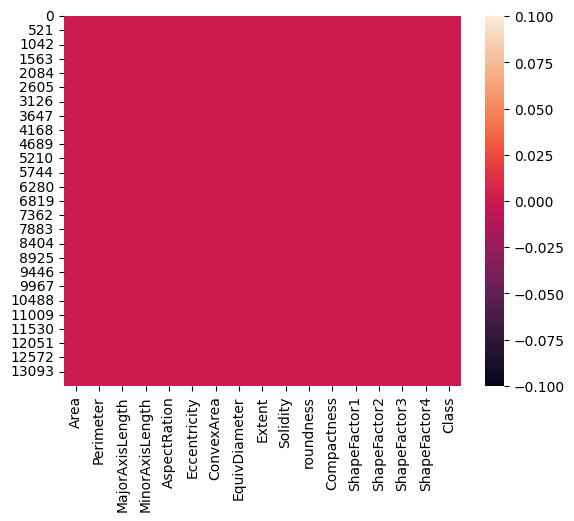

In [192]:
sns.heatmap(df.isnull())
plt.show()

### Raspodela podataka po klasama

In [193]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [194]:
print(df.Class)

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13543, dtype: object


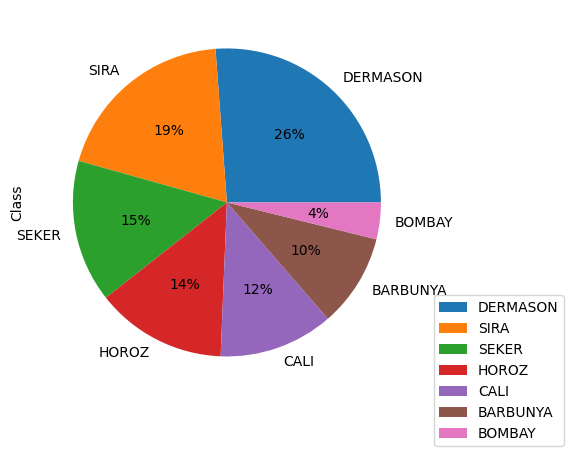

In [195]:
plt.figure(figsize=(7, 5))
pie = df.Class.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
#plt.savefig("graphs/classdistribution.jpg")
plt.show()

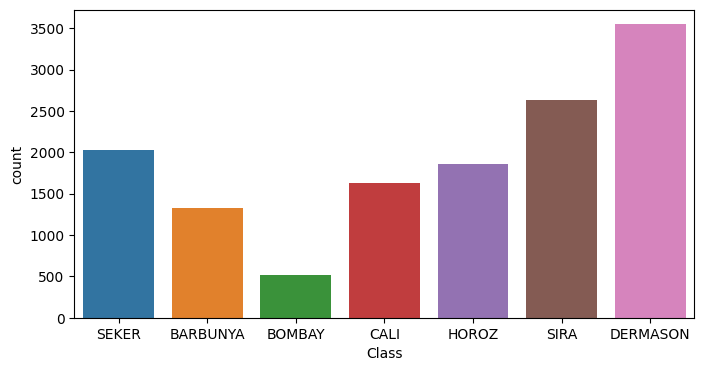

In [196]:
plt.figure(figsize=(8,4))
sns.countplot(x='Class',data=df)
plt.show()

## Deskriptivna analiza

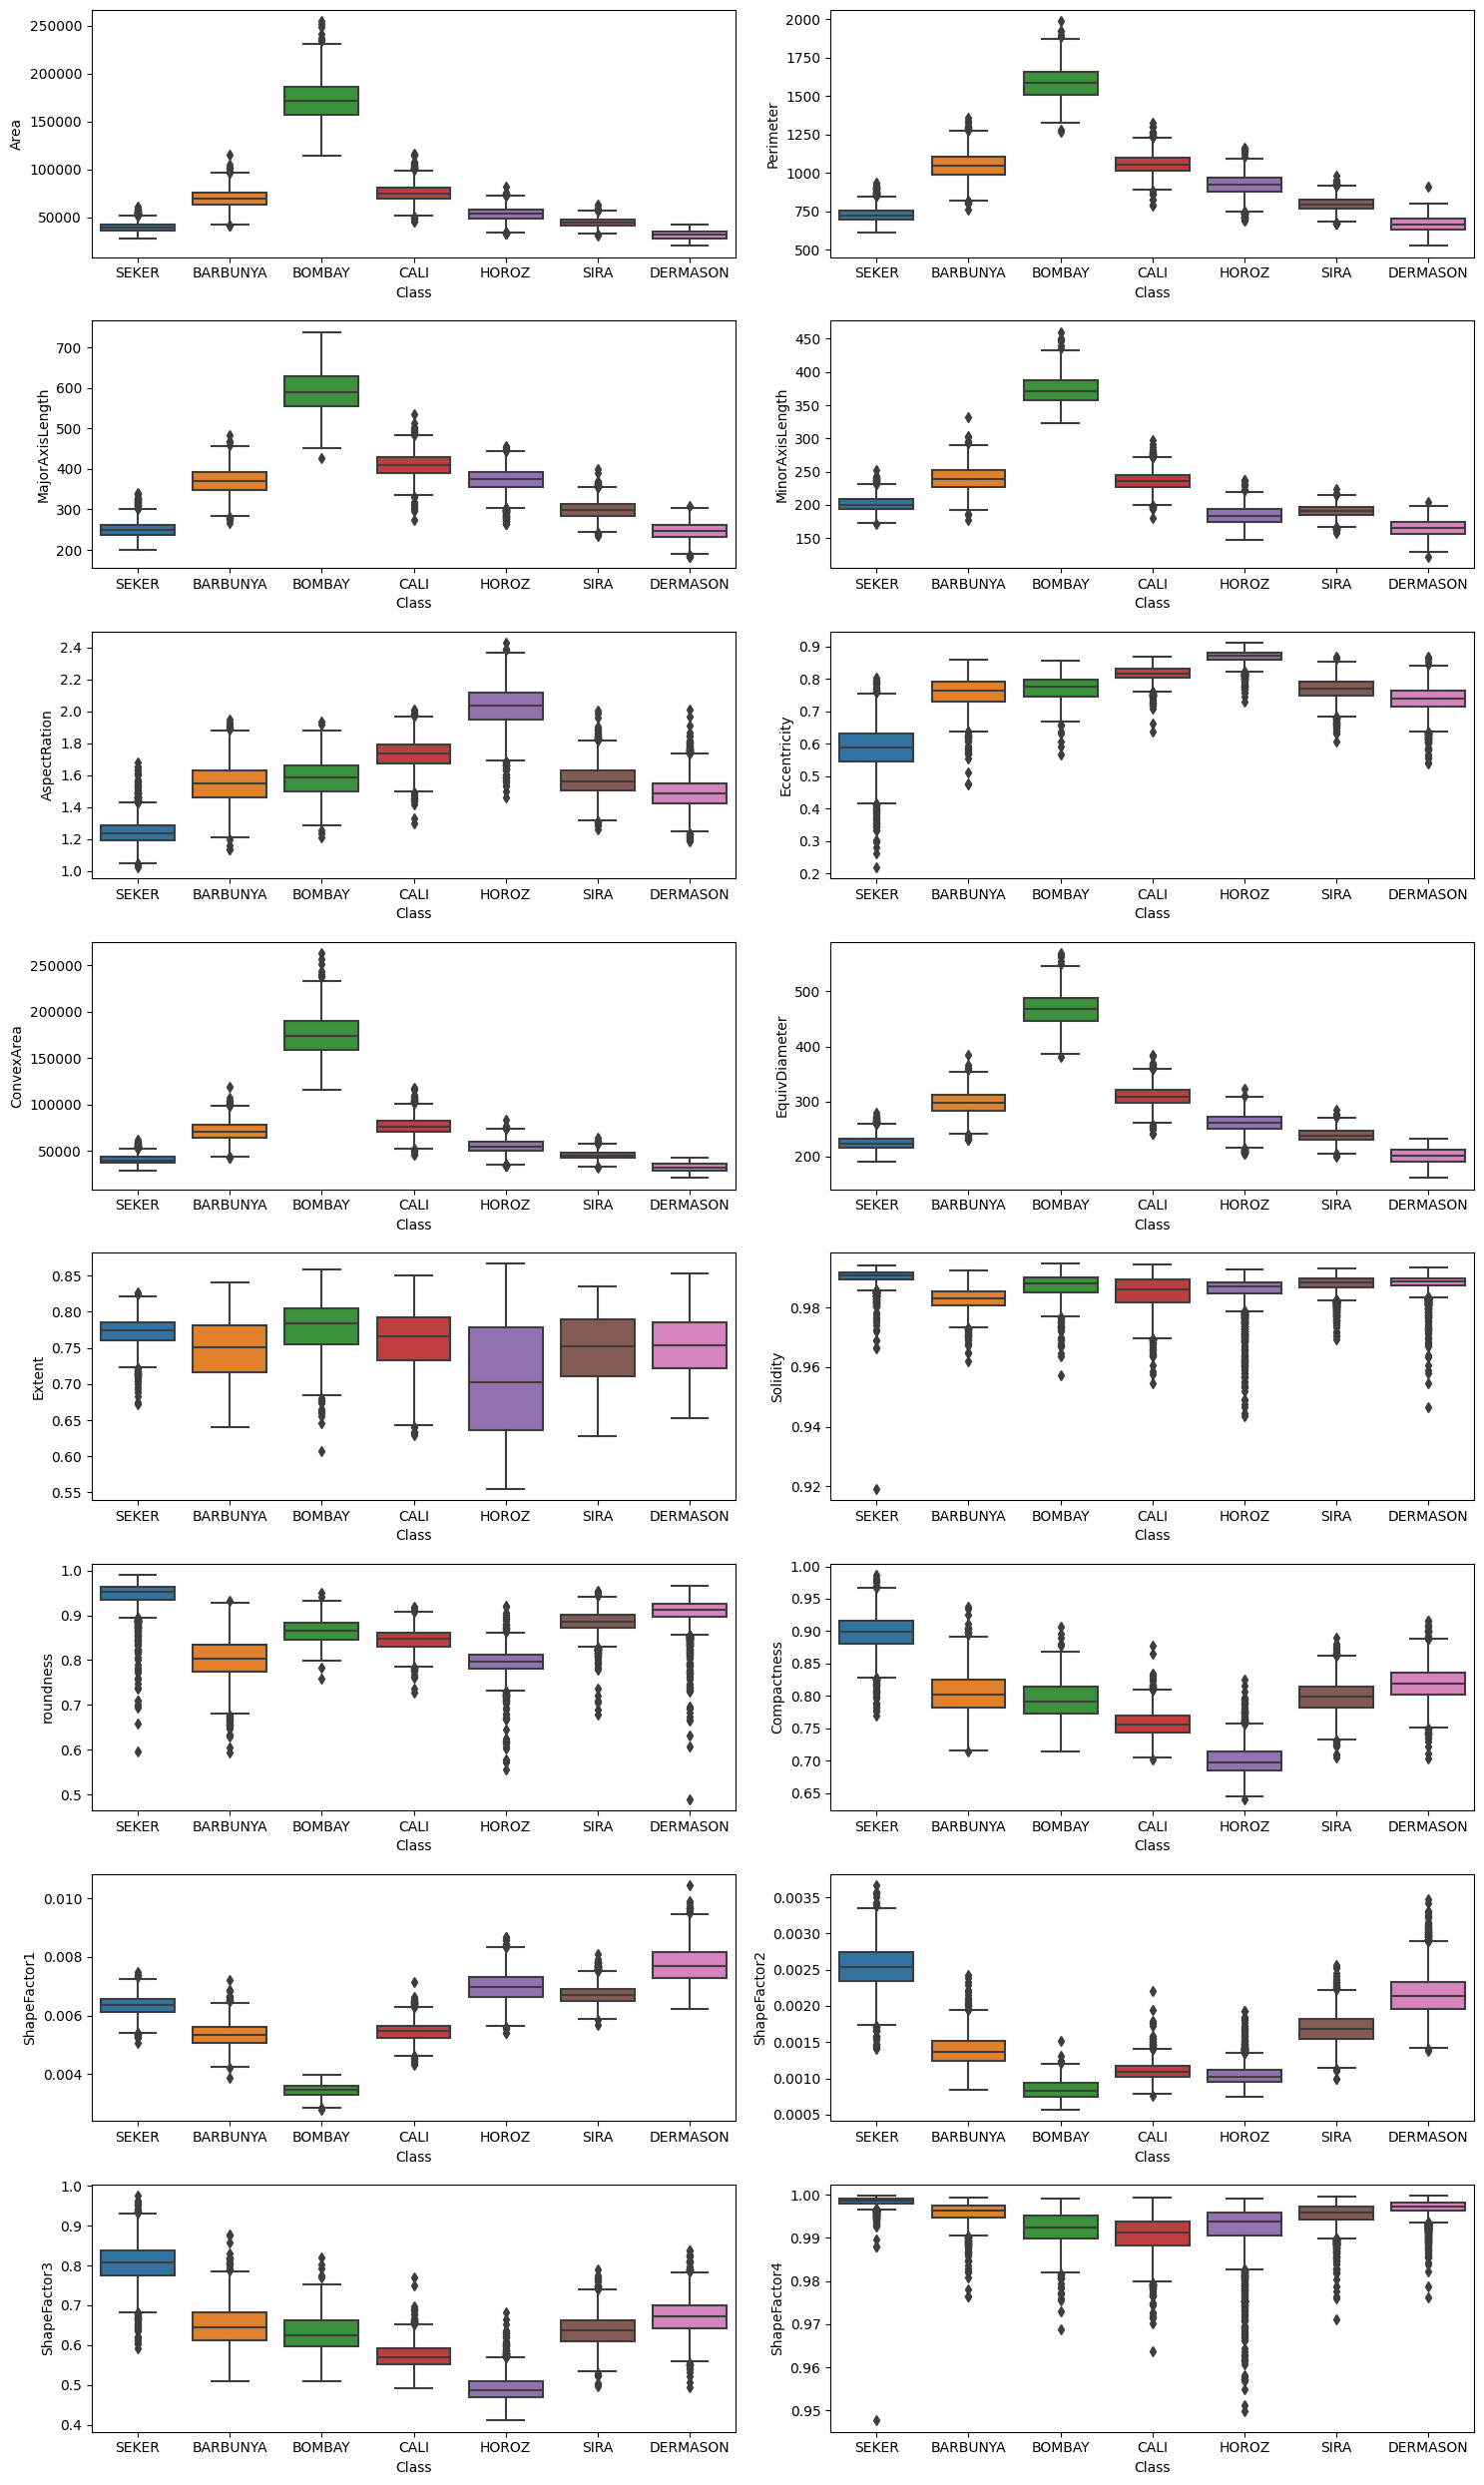

In [197]:
Numeric_cols = df.drop(columns=['Class']).columns
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot)
plt.tight_layout()

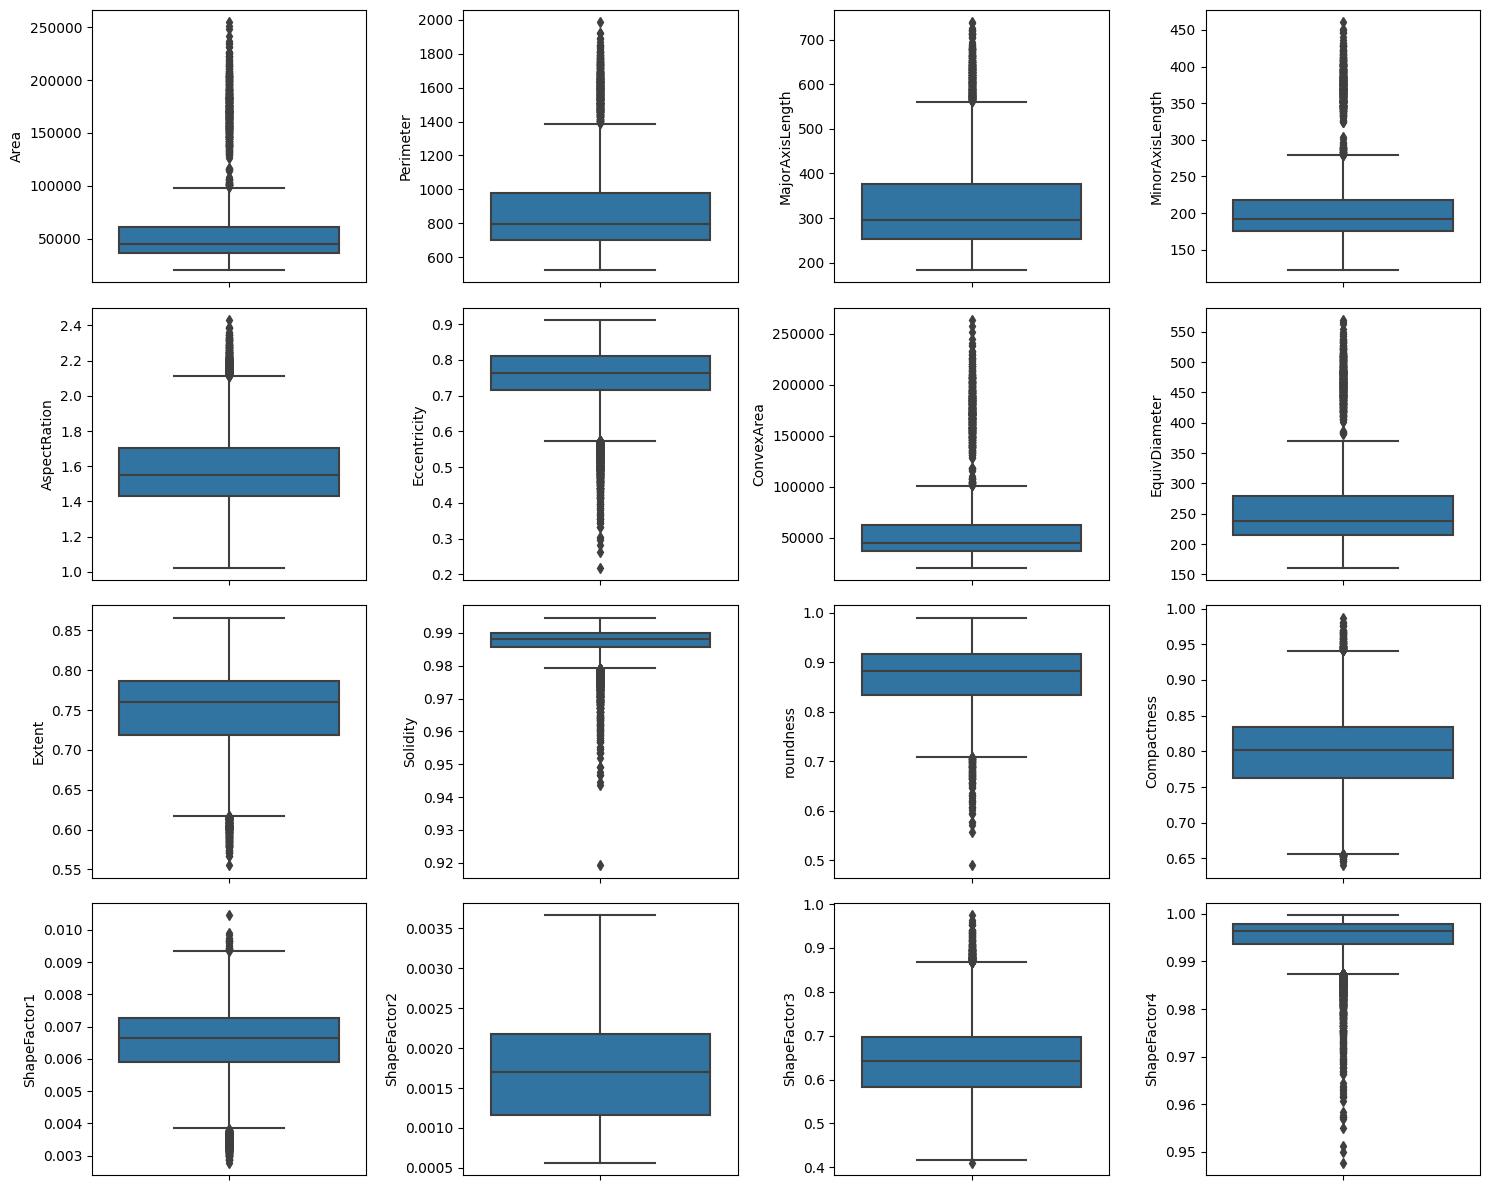

In [198]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y= df[variable], ax=subplot)
plt.tight_layout()

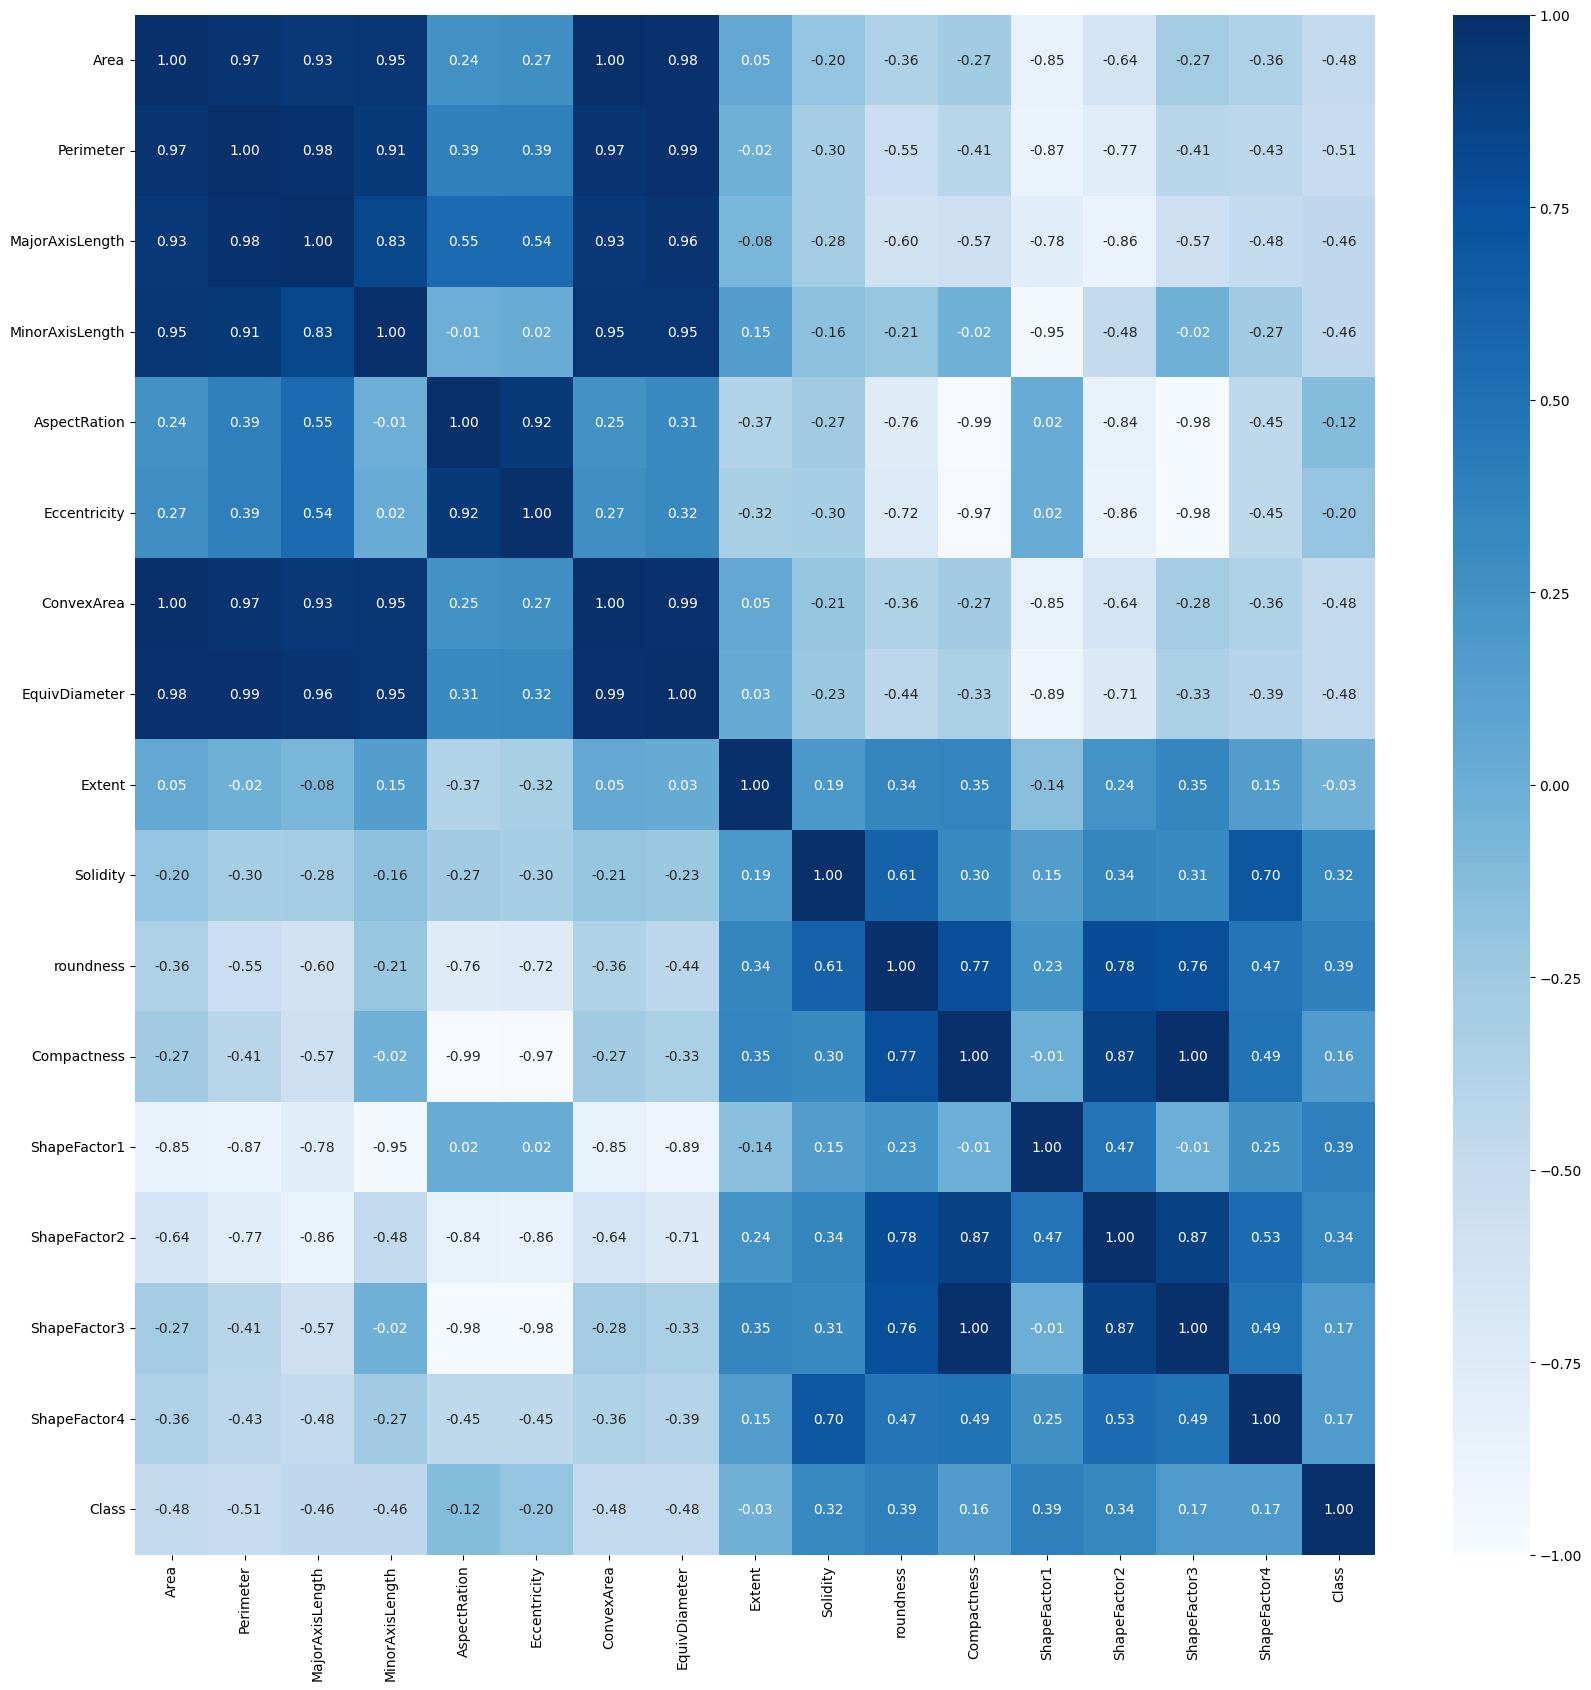

In [199]:
labelencoder = LabelEncoder()
#df['Class'] = labelencoder.fit_transform(df['Class'])
df.Class=labelencoder.fit_transform(df.Class)
df.head()

plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), 
            annot = True, 
            cmap = "Blues",
            fmt = ".2f",
            vmin = -1.00, vmax = 1.00)
plt.show()

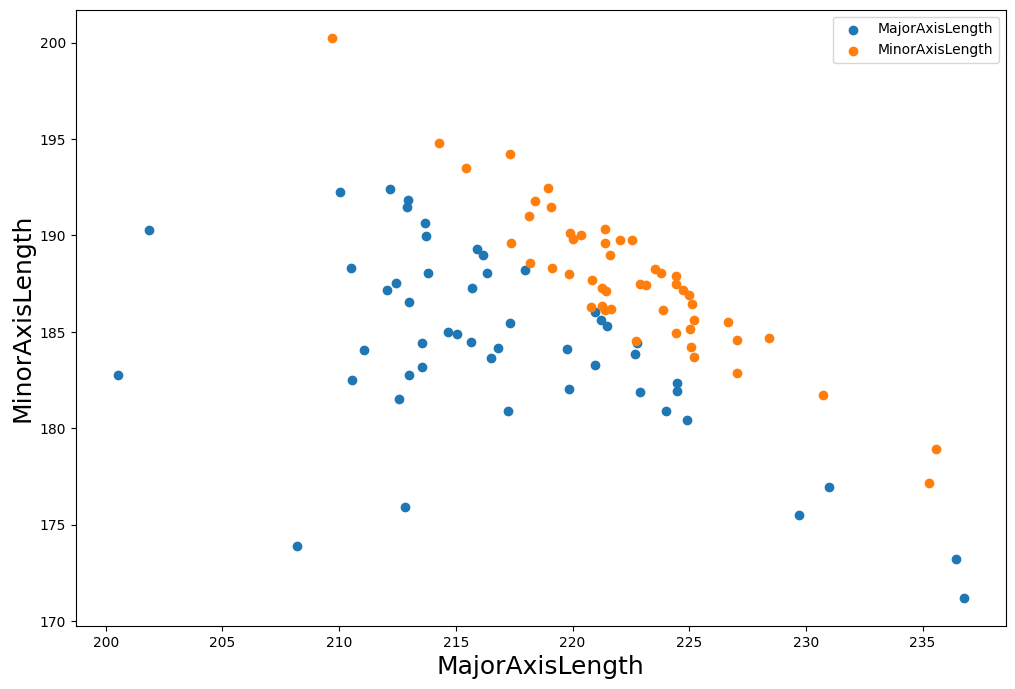

In [200]:

plt.figure(figsize=(12, 8))
plt.scatter(df[:50]['MajorAxisLength'], df[:50]['MinorAxisLength'], label='MajorAxisLength')
plt.scatter(df[50:100]['MajorAxisLength'], df[50:100]['MinorAxisLength'], label='MinorAxisLength')
plt.xlabel('MajorAxisLength', fontsize=18)
plt.ylabel('MinorAxisLength', fontsize=18)
plt.legend()

plt.show()

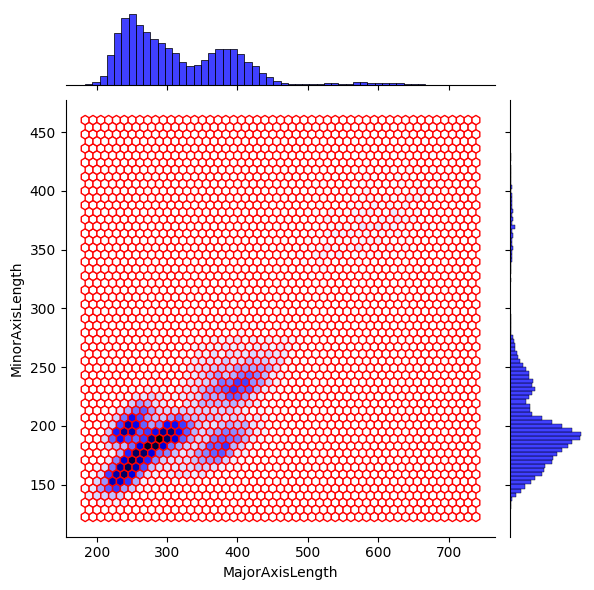

In [201]:
sns.jointplot(x='MajorAxisLength',y='MinorAxisLength',data=df,kind='hex',dropna=True,color="blue",edgecolor="red")
plt.show()

In [202]:
# sns.pairplot(data=df)
# plt.show()

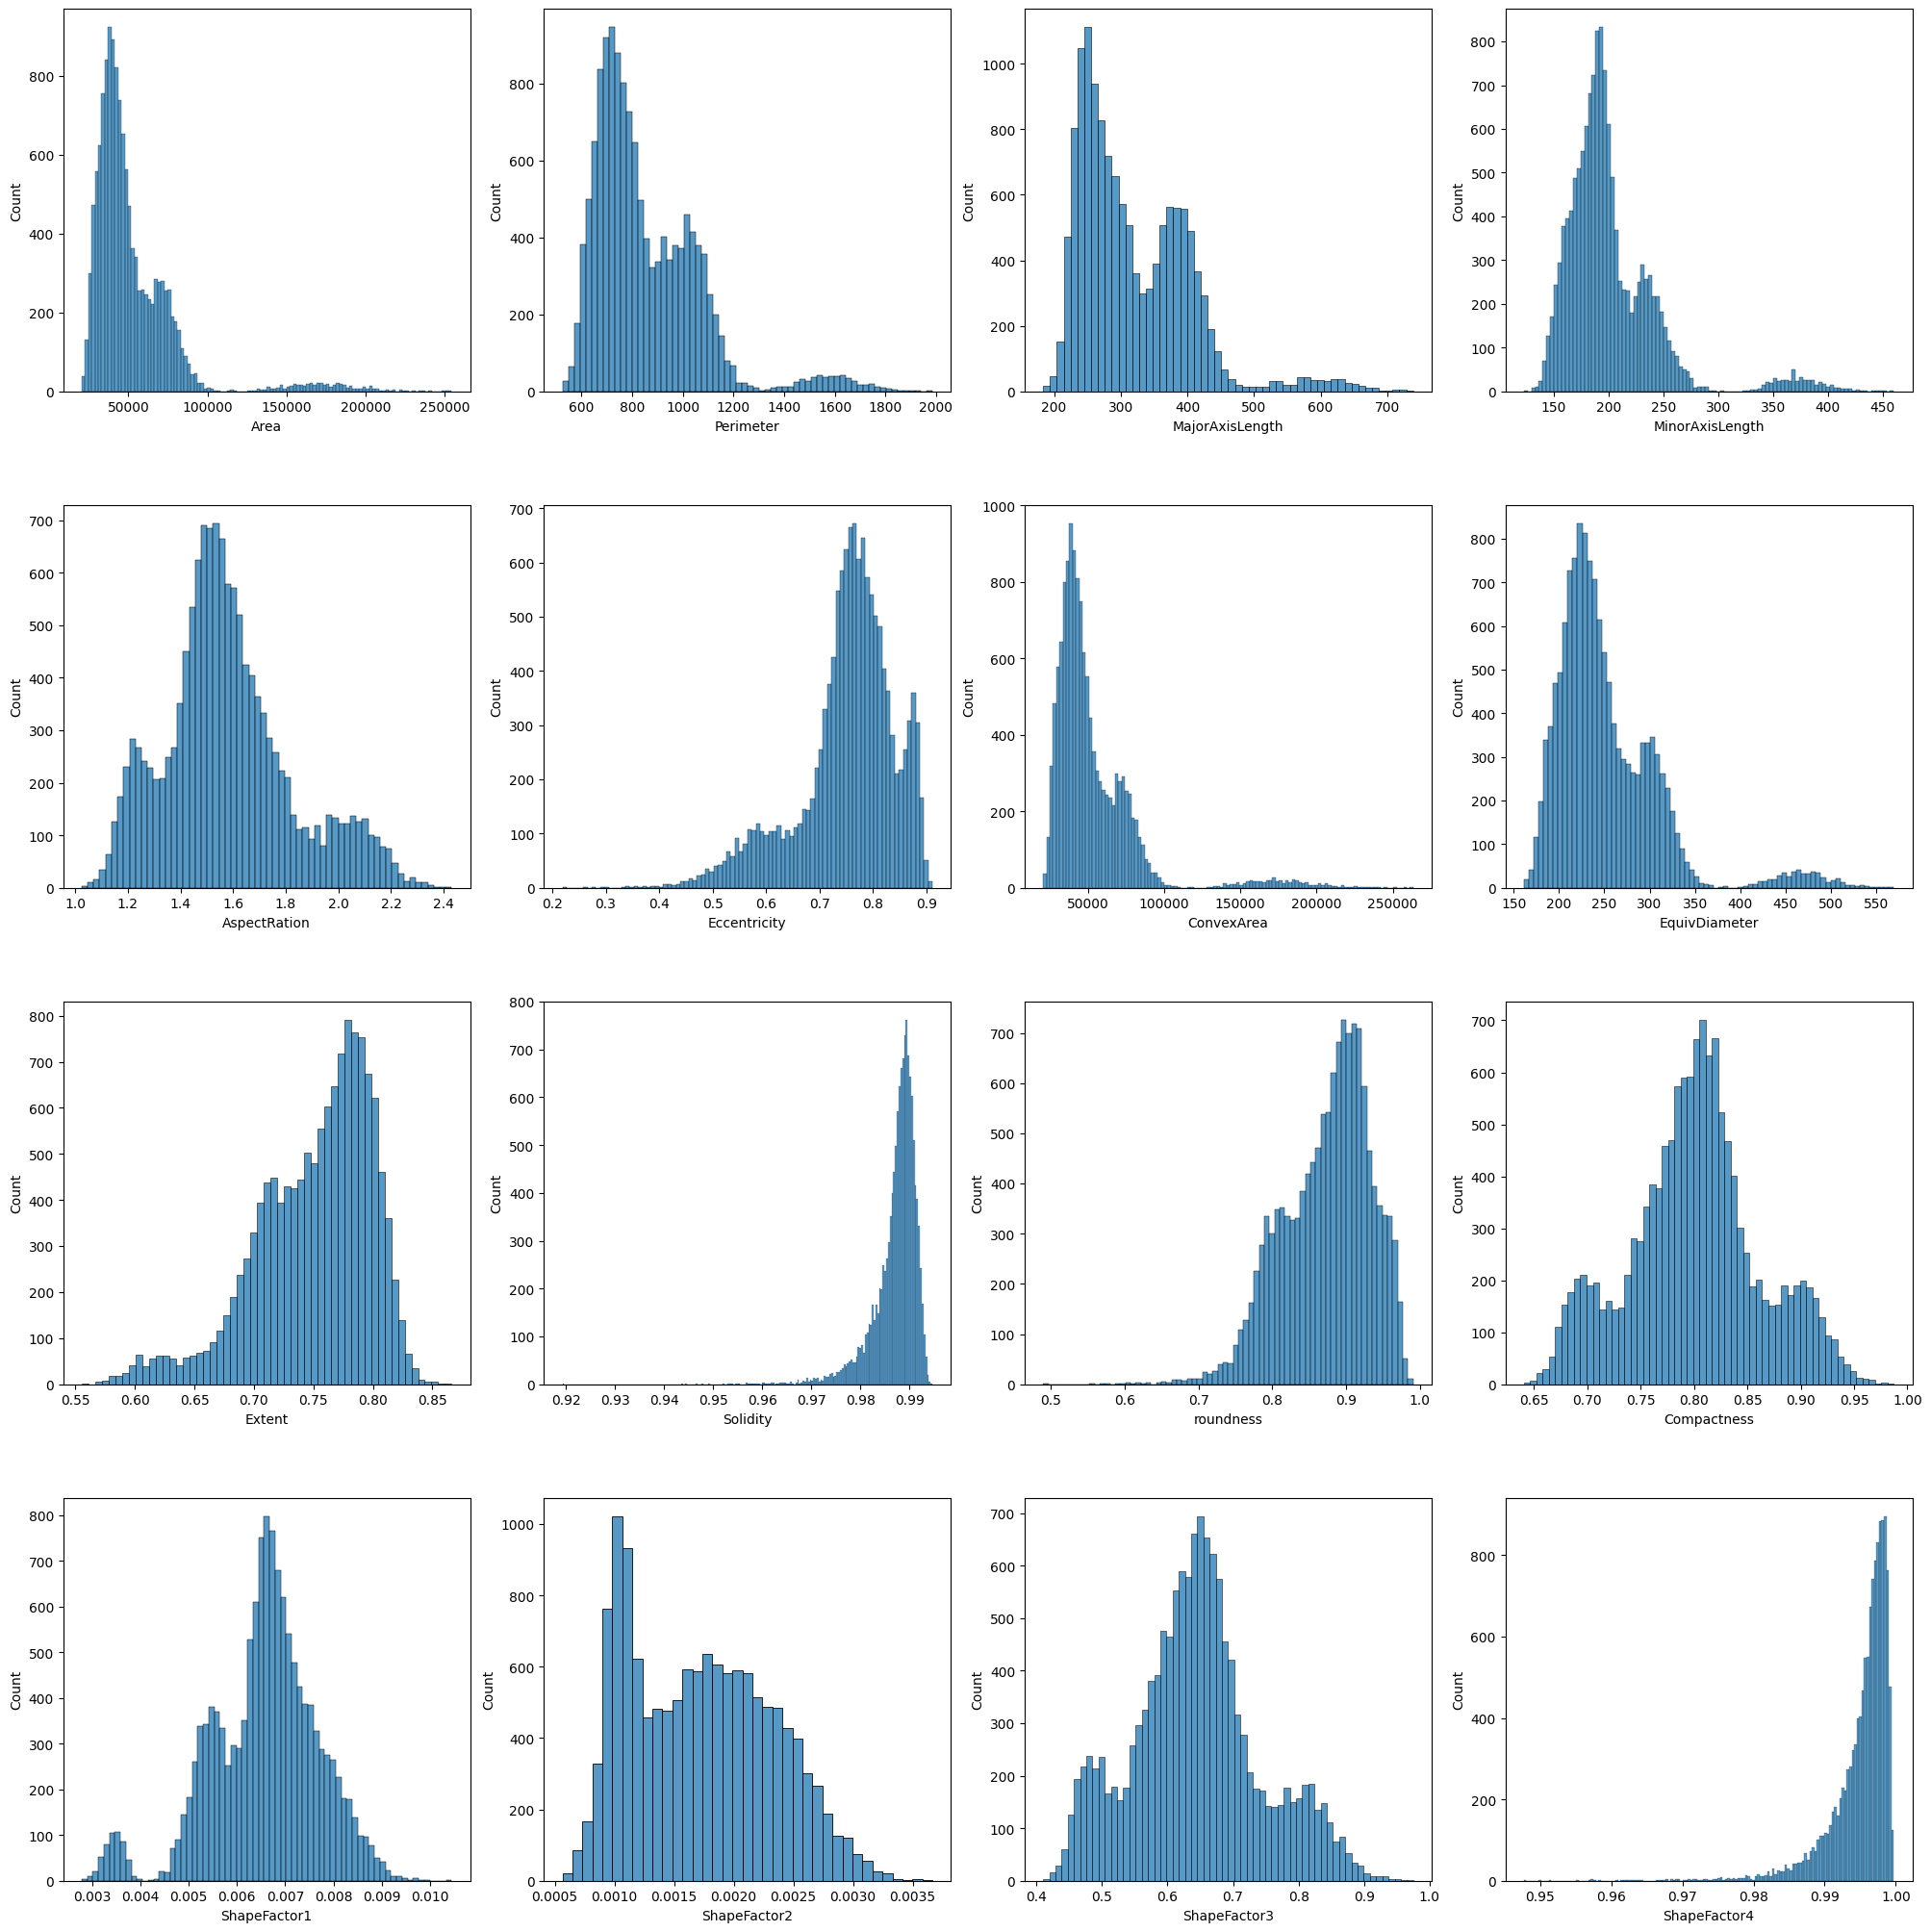

In [203]:
X = df.drop(['Class'], axis=1)
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
index = 0

axs = axs.flatten()
for k, v in X.items():
     sns.histplot(v, ax = axs[index])
     index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [204]:
# skewplot = df.Perimeter.plot(kind="density",
#               figsize=(7,5),
#               xlim=(df.Perimeter.min(),df.Perimeter.max()));
# plt.vlines(df.Perimeter.mean(), 
#            ymin=0, 
#            ymax=0.01,
#            linewidth=5.0,
#            color="black");
# plt.vlines(df.Perimeter.median(),
#            ymin=0, 
#            ymax=0.01, 
#            linewidth=2.0,
#            color="red");

# plt.show()

## Tretman outliera

### Detekcija Outliera

Area
Skewness :  2.947


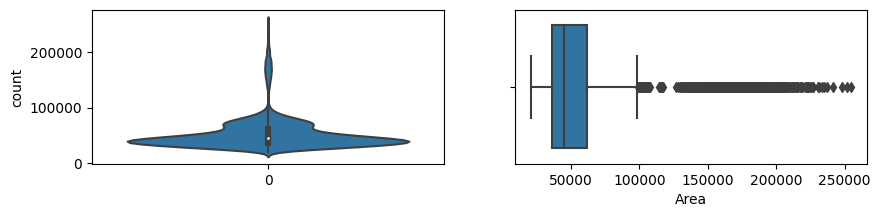

Perimeter
Skewness :  1.628


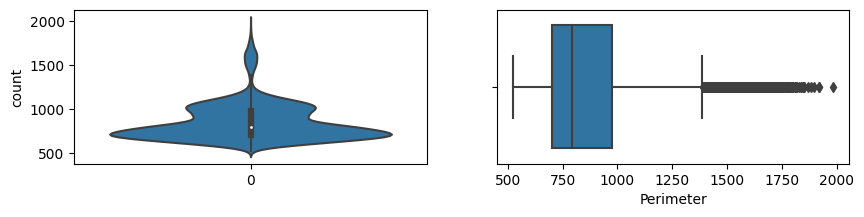

MajorAxisLength
Skewness :  1.366


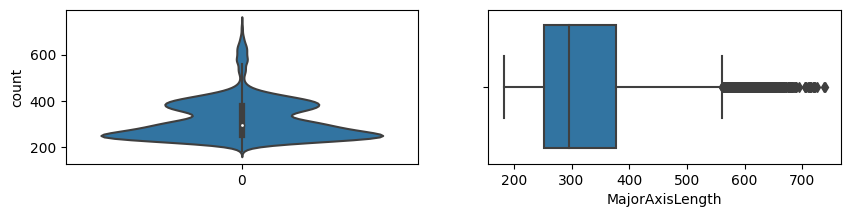

MinorAxisLength
Skewness :  2.232


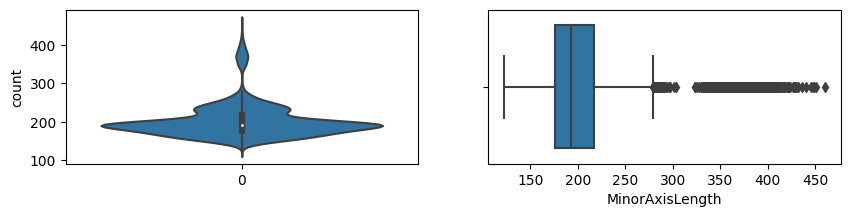

AspectRation
Skewness :  0.589


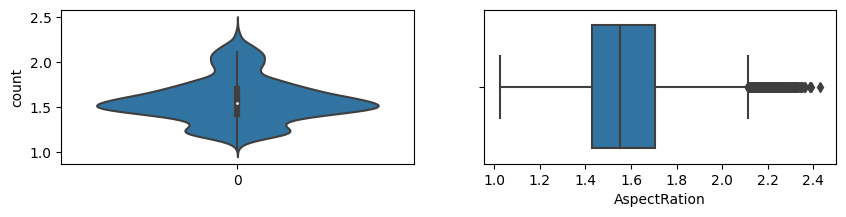

Eccentricity
Skewness :  -1.065


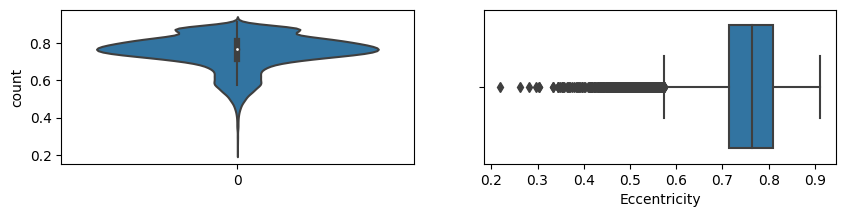

ConvexArea
Skewness :  2.936


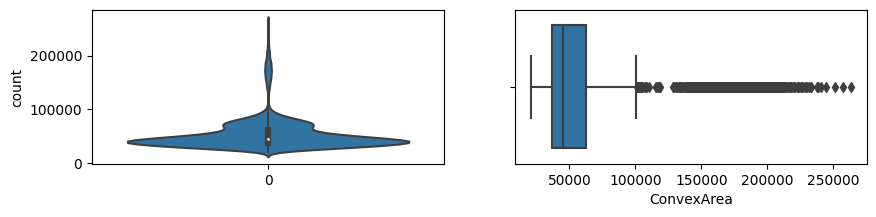

EquivDiameter
Skewness :  1.947


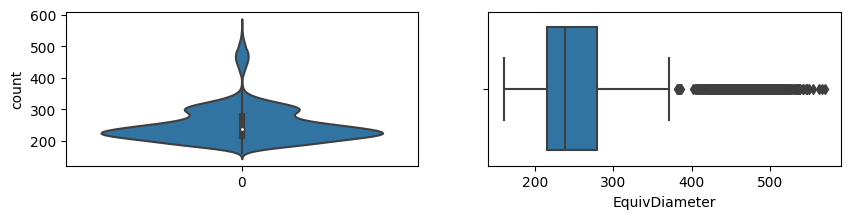

Extent
Skewness :  -0.896


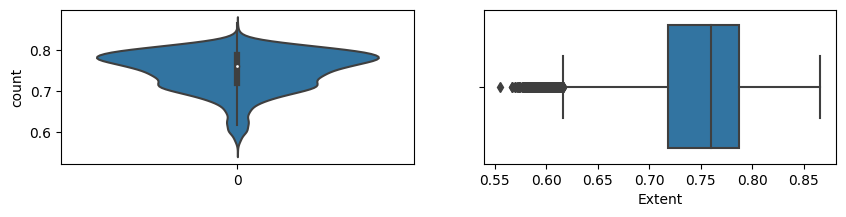

Solidity
Skewness :  -2.547


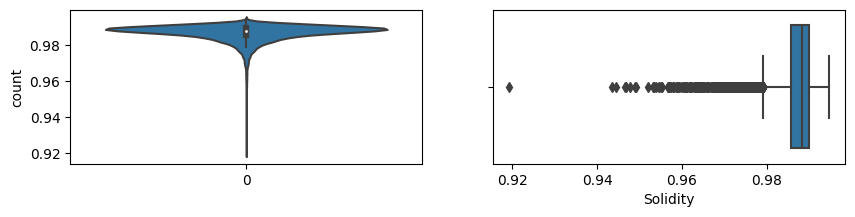

roundness
Skewness :  -0.649


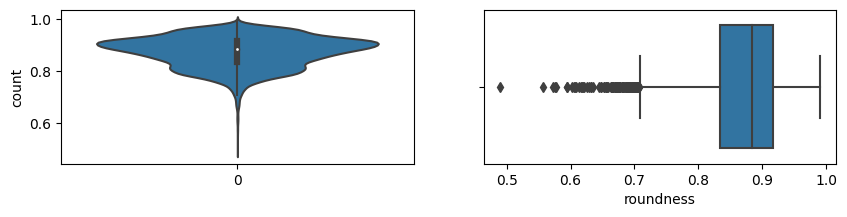

Compactness
Skewness :  0.036


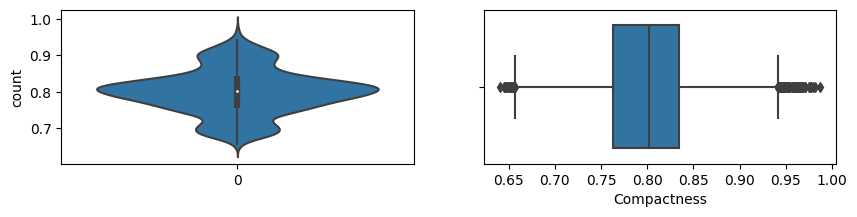

ShapeFactor1
Skewness :  -0.53


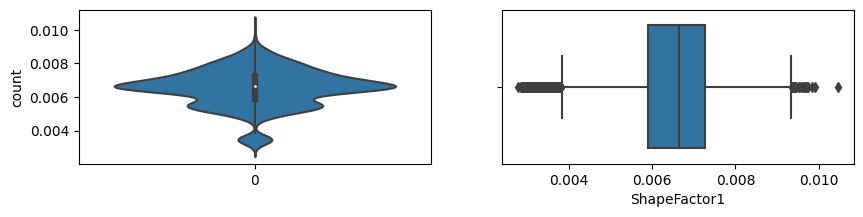

ShapeFactor2
Skewness :  0.294


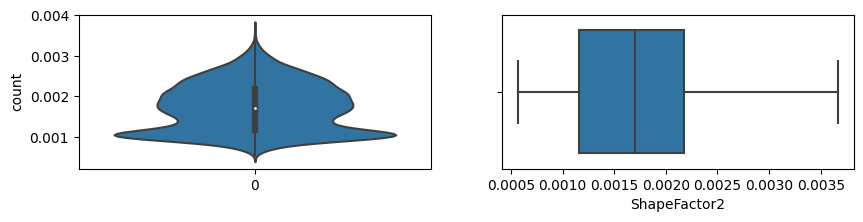

ShapeFactor3
Skewness :  0.243


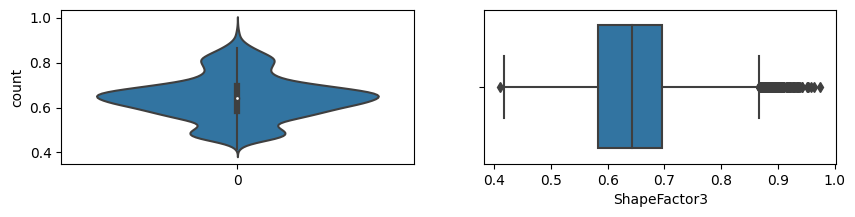

ShapeFactor4
Skewness :  -2.76


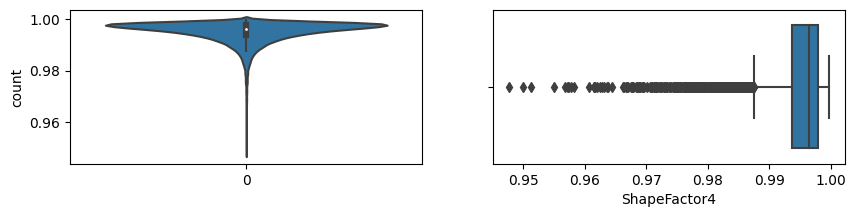

In [205]:
for i in df:
    if i !='Class':
        print(i)
        print("Skewness : ", round(df[i].skew(),3))
        plt.figure(figsize=(10,2))
        plt.subplot(1,2,1)
        sns.violinplot(df[i])
        plt.ylabel('count')
        plt.subplot(1,2,2)
        sns.boxplot(x=df[i])
        plt.show()    

### Izbacivanje Outliera

In [206]:
def remove_outliers(df):
    for col in df.columns:
        if col != 'Class':
            q25 = np.percentile(df[col] , 25)
            q75 = np.percentile(df[col] , 75)
            iqr = q75 - q25
            cut_off = iqr * 1.5
            lo = q25 - cut_off
            up = q75 + cut_off
            df[col] = df[col].clip(upper = up)
            df[col] = df[col].clip(lower=lo)

In [207]:
remove_outliers(df)

Area
Skewness :  0.962


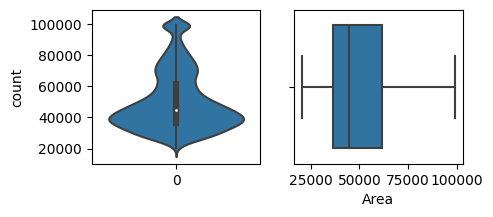

Perimeter
Skewness :  0.966


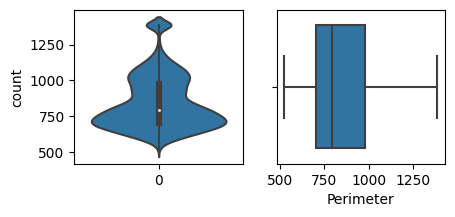

MajorAxisLength
Skewness :  0.979


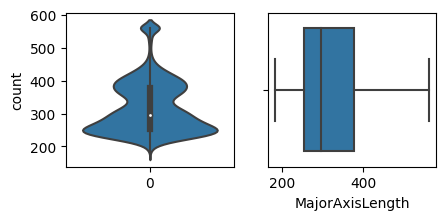

MinorAxisLength
Skewness :  0.729


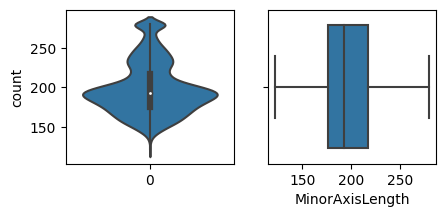

AspectRation
Skewness :  0.47


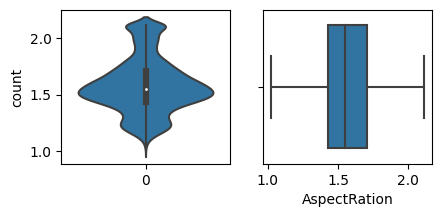

Eccentricity
Skewness :  -0.614


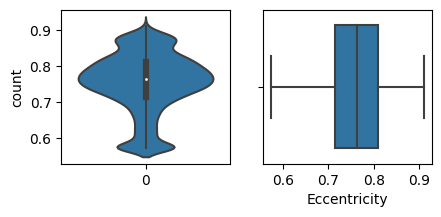

ConvexArea
Skewness :  0.969


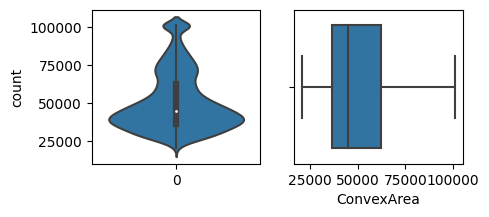

EquivDiameter
Skewness :  0.84


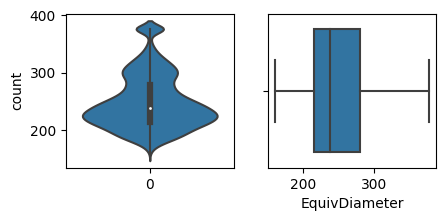

Extent
Skewness :  -0.782


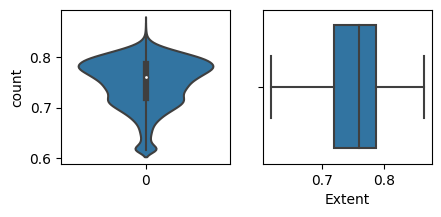

Solidity
Skewness :  -0.844


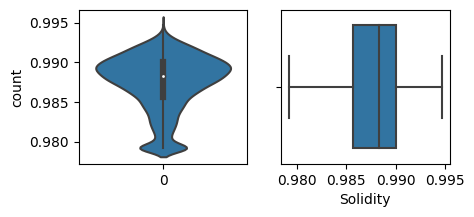

roundness
Skewness :  -0.497


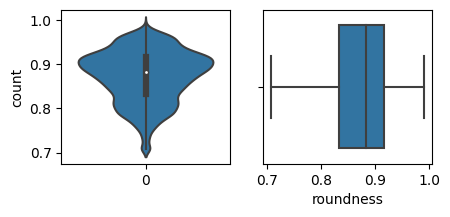

Compactness
Skewness :  0.018


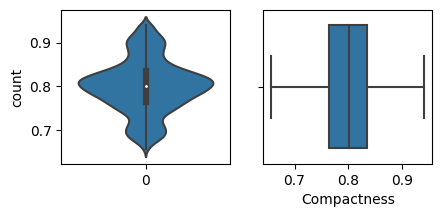

ShapeFactor1
Skewness :  -0.333


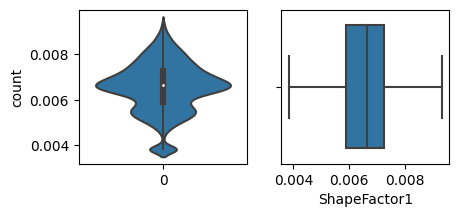

ShapeFactor2
Skewness :  0.294


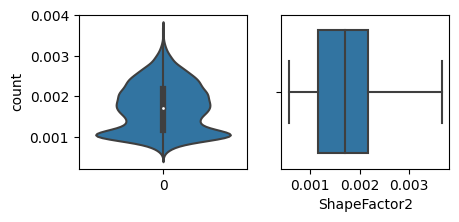

ShapeFactor3
Skewness :  0.191


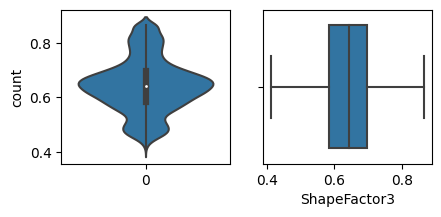

ShapeFactor4
Skewness :  -1.04


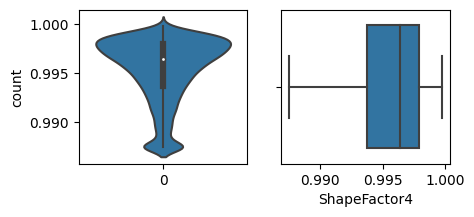

In [208]:
for i in df:
    if i !='Class':
        print(i)
        print("Skewness : ", round(df[i].skew(),3))
        plt.figure(figsize=(10,2))
        plt.subplot(1,4,1)
        sns.violinplot(df[i])
        plt.ylabel('count')
        plt.subplot(1,4,2)
        sns.boxplot(x=df[i])
        plt.show() 

## Izbacivanje visoko korelisanih fičera

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'Area'),
  Text(1.5, 0, 'Perimeter'),
  Text(2.5, 0, 'MajorAxisLength'),
  Text(3.5, 0, 'MinorAxisLength'),
  Text(4.5, 0, 'AspectRation'),
  Text(5.5, 0, 'Eccentricity'),
  Text(6.5, 0, 'ConvexArea'),
  Text(7.5, 0, 'EquivDiameter'),
  Text(8.5, 0, 'Extent'),
  Text(9.5, 0, 'Solidity'),
  Text(10.5, 0, 'roundness'),
  Text(11.5, 0, 'Compactness'),
  Text(12.5, 0, 'ShapeFactor1'),
  Text(13.5, 0, 'ShapeFactor2'),
  Text(14.5, 0, 'ShapeFactor3'),
  Text(15.5, 0, 'ShapeFactor4'),
  Text(16.5, 0, 'Class')])

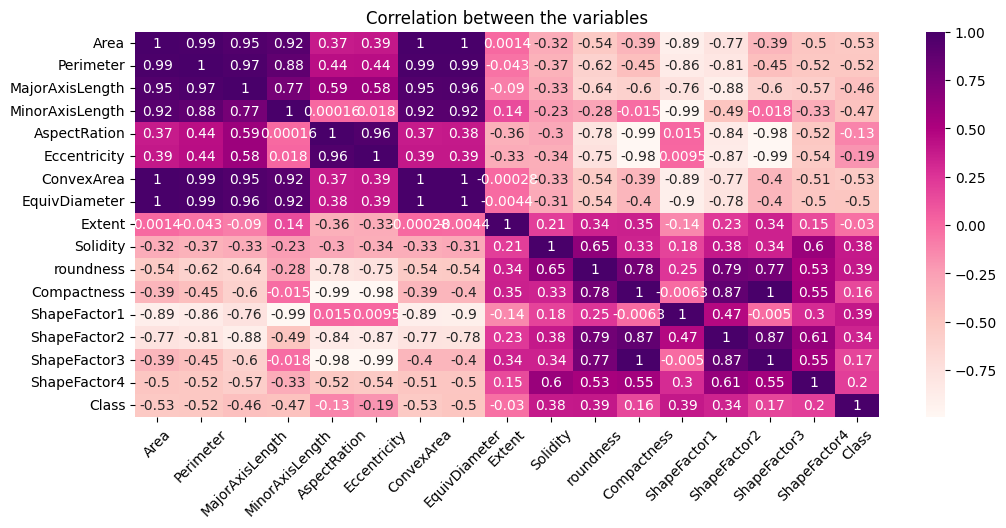

In [209]:
plt.subplots(figsize=(12,5))    #korelacija izmedju podataka
gender_correlation=df.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

In [210]:
df = pd.DataFrame(df, columns=df.columns[:17])

columns_to_drop = ['ConvexArea', 'EquivDiameter']
df.drop(columns=columns_to_drop, inplace=True)

In [211]:
# plt.subplots(figsize=(12,5))    #korelacija izmedju podataka
# gender_correlation=df.corr()
# sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
# plt.title('Correlation between the variables')
# plt.xticks(rotation=45)

## Primena algoritama nadgledanog učenja

### Podela na skupove za treniranje i testiranje

In [212]:
from sklearn.model_selection import train_test_split

data=df.values
X=data[:,0:14]
y=data[:,14]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print(f"Broj uzoraka u trening skupu podataka: {len(X_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(X_test)}")

Broj uzoraka u trening skupu podataka: 9480
Broj uzoraka u test skupu podataka: 4063


### Lazy Classifier za evaluaciju modela

In [213]:
from lazypredict.Supervised import LazyClassifier
# Kreiranje LazyClassifier objekta
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [214]:
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 28/29 [00:32<00:00,  1.18it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 9480, number of used features: 14
[LightGBM] [Info] Start training from score -2.317463
[LightGBM] [Info] Start training from score -3.273617
[LightGBM] [Info] Start training from score -2.114653
[LightGBM] [Info] Start training from score -1.339314
[LightGBM] [Info] Start training from score -1.986051
[LightGBM] [Info] Start training from score -1.885931
[LightGBM] [Info] Start training from score -1.650348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

100%|██████████| 29/29 [00:34<00:00,  1.18s/it]


In [215]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.93               0.94    None      0.93   
LGBMClassifier                     0.93               0.94    None      0.93   
XGBClassifier                      0.93               0.94    None      0.93   
LogisticRegression                 0.92               0.93    None      0.92   
BaggingClassifier                  0.92               0.93    None      0.92   
RandomForestClassifier             0.92               0.93    None      0.92   
LinearSVC                          0.92               0.93    None      0.93   
ExtraTreesClassifier               0.92               0.93    None      0.92   
CalibratedClassifierCV             0.92               0.93    None      0.92   
KNeighborsClassifier               0.92               0.93    None      0.92   
SGDClassifier                      0.92 

### LGBM Classifier

In [216]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lgbm_model = LGBMClassifier(verbose=-1)

lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

accuracyLGBM = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracyLGBM*100:.2f}")


Accuracy: 92.84


In [217]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

lgbm_model2 = make_pipeline(StandardScaler(), LGBMClassifier(verbose=-1))

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(lgbm_model2, X, y, cv=cv, scoring='accuracy')

average_cv_accuracy = np.mean(cv_scores)
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")



Average Cross-validated Accuracy: 92.84%


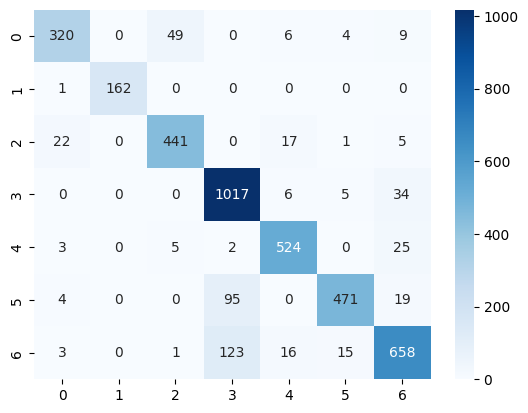

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       388
         1.0       1.00      0.99      1.00       163
         2.0       0.89      0.91      0.90       486
         3.0       0.82      0.96      0.88      1062
         4.0       0.92      0.94      0.93       559
         5.0       0.95      0.80      0.87       589
         6.0       0.88      0.81      0.84       816

    accuracy                           0.88      4063
   macro avg       0.91      0.89      0.90      4063
weighted avg       0.89      0.88      0.88      4063



In [227]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()
print(classification_report(y_test, y_pred))

### ADABOOST Classiffier

In [221]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier(ccp_alpha=0, criterion='entropy',
                       min_samples_split=3, random_state=0,max_depth=4)

adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

adaboost_classifier.fit(X_train, y_train)

y_pred = adaboost_classifier.predict(X_test)

accuracyXGBC = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracyXGBC*100:.2f}%")

Accuracy: 88.43%


In [223]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

abst_model = make_pipeline(StandardScaler(), adaboost_classifier)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(abst_model, X, y, cv=cv, scoring='accuracy')

average_cv_accuracy = np.mean(cv_scores)
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 89.19%


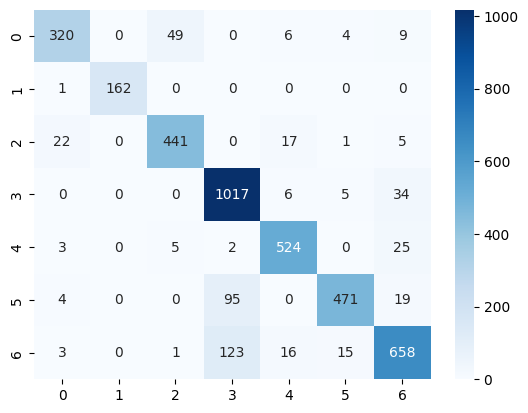

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       388
         1.0       1.00      0.99      1.00       163
         2.0       0.89      0.91      0.90       486
         3.0       0.82      0.96      0.88      1062
         4.0       0.92      0.94      0.93       559
         5.0       0.95      0.80      0.87       589
         6.0       0.88      0.81      0.84       816

    accuracy                           0.88      4063
   macro avg       0.91      0.89      0.90      4063
weighted avg       0.89      0.88      0.88      4063



In [228]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()
print(classification_report(y_test, y_pred))

### XGBC Classifier

In [156]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

le = LabelEncoder()
y_encoded = le.fit_transform(y)

xgb_model = make_pipeline(StandardScaler(), XGBClassifier())

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracyXGBC = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracyXGBC*100:.2f}%")

Accuracy: 92.52%


In [157]:
xgbc_model = make_pipeline(StandardScaler(), XGBClassifier(verbose=-1))

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(xgbc_model, X, y_encoded, cv=cv, scoring='accuracy')

average_cv_accuracy = np.mean(cv_scores)
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 92.70%


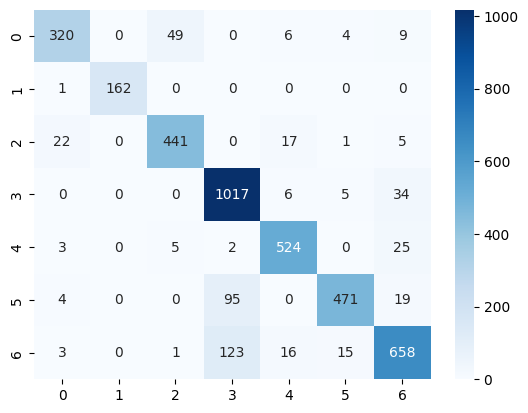

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       388
         1.0       1.00      0.99      1.00       163
         2.0       0.89      0.91      0.90       486
         3.0       0.82      0.96      0.88      1062
         4.0       0.92      0.94      0.93       559
         5.0       0.95      0.80      0.87       589
         6.0       0.88      0.81      0.84       816

    accuracy                           0.88      4063
   macro avg       0.91      0.89      0.90      4063
weighted avg       0.89      0.88      0.88      4063



In [231]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

print(classification_report(y_test, y_pred))

### DECISION TREE

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

stdscalar=StandardScaler()
X_train=stdscalar.fit_transform(X_train)
X_test=stdscalar.transform(X_test)
dtree=DecisionTreeClassifier(ccp_alpha=0, criterion='entropy',
                       min_samples_split=3, random_state=0,max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=4,
                       min_samples_split=3, random_state=0)

In [116]:
from sklearn.metrics import accuracy_score
pred_dtree=dtree.predict(X_test)
accuracy_score(y_test,pred_dtree)

0.8658626630568546

In [118]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dtree, X, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 86.18%


              precision    recall  f1-score   support

         0.0       0.87      0.59      0.70       391
         1.0       1.00      0.99      1.00       157
         2.0       0.78      0.90      0.83       461
         3.0       0.88      0.90      0.89      1064
         4.0       0.92      0.94      0.93       567
         5.0       0.94      0.93      0.94       636
         6.0       0.78      0.81      0.79       787

    accuracy                           0.87      4063
   macro avg       0.88      0.87      0.87      4063
weighted avg       0.87      0.87      0.86      4063



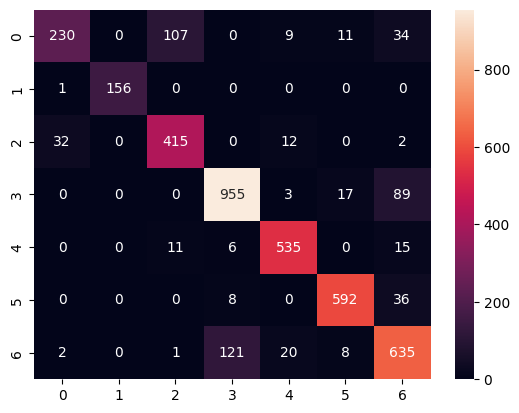

In [119]:
from sklearn.metrics import classification_report
cm=pd.DataFrame(confusion_matrix(y_test, pred_dtree))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred_dtree))
plt.show()

In [120]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_dtree))

Mean Absolute error of decision tree 0.3561407826729018


In [99]:
# plt.figure(figsize=(15,15))
# from sklearn import tree
# tree.plot_tree(dtree)

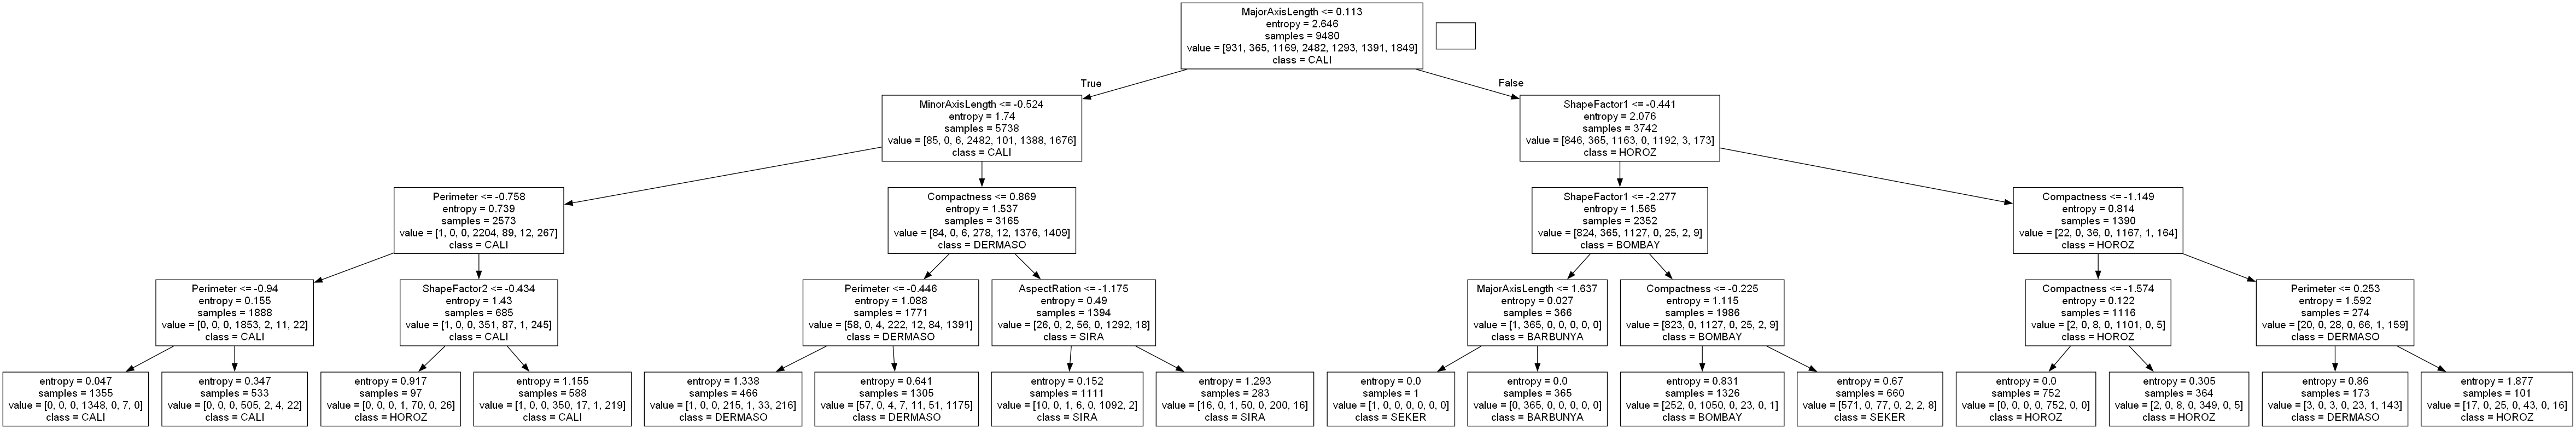

In [121]:
import pydotplus
from sklearn import tree
from IPython.display import Image

cols = [col for col in df.columns if col not in ['Class']]
data_features = df[cols]
dot_data = tree.export_graphviz(dtree,
 out_file=None,
feature_names=data_features.columns,
 class_names=['SEKER','BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASO'])

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_graphviz_executables({'dot': 'C:/Program Files/Graphviz/bin/dot.exe'})  # Putanja na Eminom racunaru

Image(graph.create_png())

### RANDOM FOREST

In [122]:
from sklearn.ensemble import RandomForestClassifier
rfe=RandomForestClassifier()
rfeModel = rfe.fit(X_train,y_train)

In [123]:
pred_rfe=rfe.predict(X_test)
accuracy_score(y_test,pred_rfe)

0.9239478218065469

In [124]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rfe, X, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 92.33%


              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       391
         1.0       1.00      1.00      1.00       157
         2.0       0.93      0.95      0.94       461
         3.0       0.90      0.94      0.92      1064
         4.0       0.96      0.95      0.95       567
         5.0       0.94      0.96      0.95       636
         6.0       0.88      0.84      0.86       787

    accuracy                           0.92      4063
   macro avg       0.94      0.93      0.94      4063
weighted avg       0.92      0.92      0.92      4063



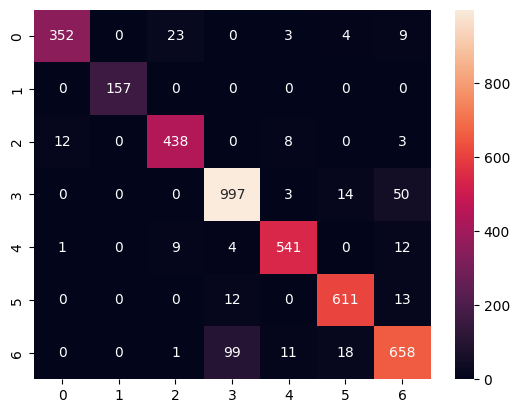

In [125]:
con=pd.DataFrame(confusion_matrix(y_test, pred_rfe))
sns.heatmap(con, annot=True, fmt='d')
print(classification_report(y_test, pred_rfe))
plt.show()

In [126]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_rfe))

Mean Absolute error of decision tree 0.19517597834112724


#### Optimizacija RF modela izborom relevantnih atributa

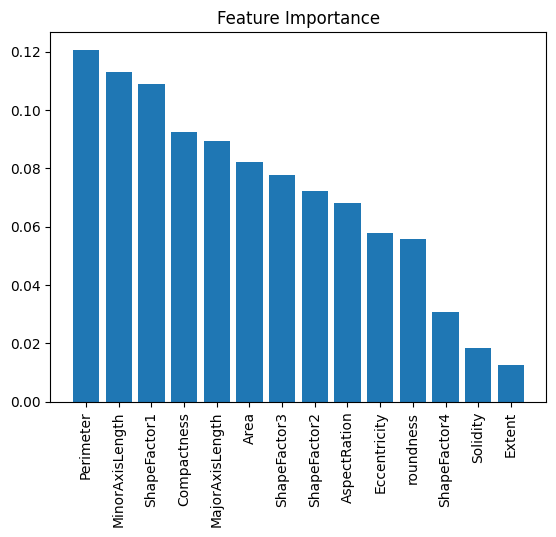

In [127]:
importances = rfeModel.feature_importances_
indices = np.argsort(importances)[::-1]
names = [data_features.columns[i] for i in indices]

plt.figure()

plt.title("Feature Importance")

plt.bar(range(X_train.shape[1]), importances[indices])

plt.xticks(range(X_train.shape[1]), names, rotation=90)

plt.show()

In [128]:
from sklearn.feature_selection import SelectFromModel


def selectFeaturesRF(th):
    selector = SelectFromModel(rfe, threshold=th) 

    features_important = selector.fit_transform(X_train, y_train)

    test_important = selector.transform(X_test)

    randomForestModel = rfe.fit(features_important, y_train)

    predRFC = randomForestModel.predict(test_important)

    print("RandomForest accuracy : ",accuracy_score(y_test, predRFC, normalize = True))
    print(confusion_matrix(y_test, predRFC))
    report = classification_report(y_test,predRFC, digits=5)

    return accuracy_score(y_test, predRFC)

accRFopt = selectFeaturesRF(0.015)

RandomForest accuracy :  0.9256706866847157
[[353   0  21   0   3   2  12]
 [  0 157   0   0   0   0   0]
 [ 12   0 438   0   8   0   3]
 [  0   0   0 997   3  17  47]
 [  1   0   8   3 542   0  13]
 [  1   0   0  11   0 610  14]
 [  0   0   2  95  11  15 664]]


### SVM

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler 

np.set_printoptions(edgeitems=127)

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(X_train)
X_test=stdscaler.transform(X_test)

svm = SVC(C=10,kernel='rbf', gamma=0.1)
svm.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

In [130]:
pred_svm=svm.predict(X_test)
print(accuracy_score(y_test,pred_svm))

0.9340388875215359


In [134]:
# from sklearn.model_selection import cross_val_score, KFold

# cv = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(svm, X, y, cv=cv, scoring='accuracy')
# average_cv_accuracy = cv_scores.mean()
# print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")

In [135]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_svm))

Mean Absolute error of decision tree 0.1740093526950529


              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       391
         1.0       1.00      1.00      1.00       157
         2.0       0.95      0.95      0.95       461
         3.0       0.90      0.94      0.92      1064
         4.0       0.96      0.96      0.96       567
         5.0       0.96      0.97      0.96       636
         6.0       0.90      0.85      0.88       787

    accuracy                           0.93      4063
   macro avg       0.95      0.94      0.95      4063
weighted avg       0.93      0.93      0.93      4063



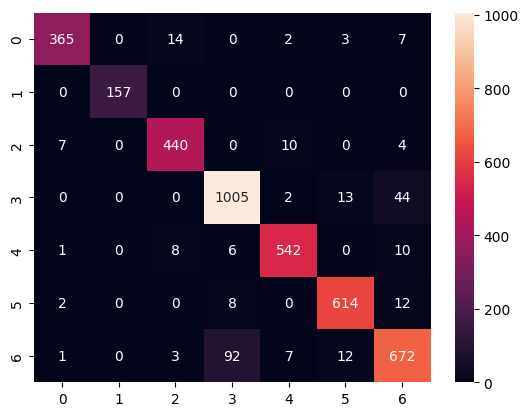

In [136]:
cm=pd.DataFrame(confusion_matrix(y_test, pred_svm))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred_svm))
plt.show()

### LOGISTIC REGRESSION

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

lr=LogisticRegression(C=10)
stdscalar=StandardScaler()
X_train=stdscalar.fit_transform(X_train)
X_test=stdscalar.transform(X_test)

lr.fit(X_train,y_train)

LogisticRegression(C=10)

In [139]:
pred_lr=lr.predict(X_test)
accuracy_score(y_test, pred_lr)

0.9259168102387398

In [140]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, pred_lr))

0.19173024858478957


              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       391
         1.0       1.00      1.00      1.00       157
         2.0       0.93      0.95      0.94       461
         3.0       0.91      0.92      0.91      1064
         4.0       0.96      0.96      0.96       567
         5.0       0.95      0.96      0.96       636
         6.0       0.86      0.87      0.86       787

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



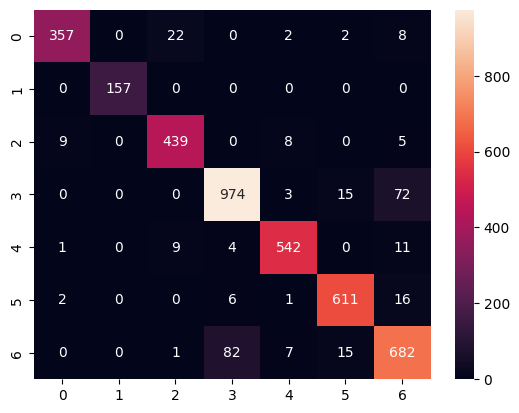

In [141]:
cm=pd.DataFrame(confusion_matrix(y_test, pred_lr))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred_lr))
plt.show()

### NAIVE BAYES CLASSIFIER

In [142]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [143]:
pred_nb=gnb.predict(X_test)
accuracy_score(y_test,pred_nb)

0.9045040610386414

In [144]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gnb, X, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 81.33%


              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       391
         1.0       1.00      0.99      1.00       157
         2.0       0.87      0.92      0.89       461
         3.0       0.92      0.89      0.90      1064
         4.0       0.95      0.96      0.96       567
         5.0       0.93      0.95      0.94       636
         6.0       0.84      0.86      0.85       787

    accuracy                           0.90      4063
   macro avg       0.92      0.91      0.91      4063
weighted avg       0.91      0.90      0.90      4063



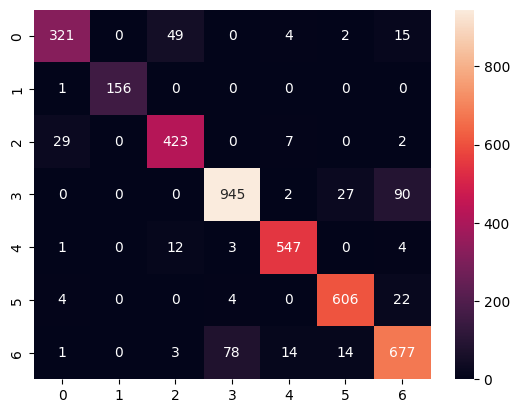

In [145]:
conm=pd.DataFrame(confusion_matrix(y_test, pred_nb))
sns.heatmap(conm, annot=True, fmt='d')
print(classification_report(y_test, pred_nb))
plt.show()

In [146]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_nb))

Mean Absolute error of decision tree 0.2471080482402166


### KNN

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)

In [149]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn_clf_sk_3 = KNeighborsClassifier(n_neighbors=3)
knn_clf_sk_3.fit(X_train, y_train)
knn_clf_sk_3.score(X_test, y_test)

0.9138567560915579

In [150]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_clf_sk_3, X_scaled, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 91.84%


KNeighbors accuracy :  0.9138567560915579
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       391
         1.0       1.00      1.00      1.00       157
         2.0       0.92      0.93      0.92       461
         3.0       0.89      0.92      0.91      1064
         4.0       0.96      0.94      0.95       567
         5.0       0.96      0.95      0.96       636
         6.0       0.85      0.83      0.84       787

    accuracy                           0.91      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.91      0.91      0.91      4063



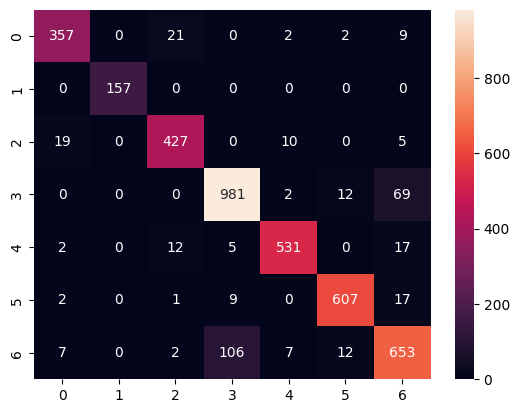

In [151]:
nnModel = knn_clf_sk_3.fit(X_train, y_train)

predNN = nnModel.predict(X_test)

print("KNeighbors accuracy : ",accuracy_score(y_test, predNN, normalize = True))

conm=pd.DataFrame(confusion_matrix(y_test, predNN))
sns.heatmap(conm, annot=True, fmt='d')
print(classification_report(y_test, predNN))
plt.show()

In [152]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, predNN))

Mean Absolute error of decision tree 0.23086389367462465


### Poredjenje rezultata različitih modela

In [162]:
print('Decision tree: ',(dtree.score(X_test, y_test)*100), '%')
print('\n')
print('KNN: ',(knn_clf_sk_3.score(X_test, y_test)*100),'%')
print('\n')
print('Random Forest:', (accRFopt) * 100)
print('\n')
print('Naive Bayes Classifier: ', (gnb.score(X_test, y_test)*100),'%')
print('\n')
print('Logistic Regresion: ', (lr.score(X_test, y_test)*100),'%')
print('\n')
print('SVM: ', (svm.score(X_test, y_test)*100),'%')
print('\n')
print('LGBM: ', (accuracyLGBM*100),'%')
print('\n')
print('XGBC: ', (accuracyXGBC*100),'%')

Decision tree:  86.58626630568546 %


KNN:  91.3856756091558 %


Random Forest: 92.56706866847158


Naive Bayes Classifier:  90.45040610386414 %


Logistic Regresion:  92.59168102387399 %


SVM:  93.40388875215359 %


LGBM:  92.78857986709328 %


XGBC:  92.51784395766674 %


## UnderSampling

### Distribucija po klasama nakon undersampling-a

In [163]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel('Dry_Bean_Dataset.xlsx')
X = df.drop('Class', axis=1)
y = df['Class']

print("Before UnderSampling, counts of 'DERMASON': {}".format(sum(y == 'DERMASON')))
print("Before UnderSampling, counts of 'SIRA': {}".format(sum(y == 'SIRA')))
print("Before UnderSampling, counts of 'SEKER': {}".format(sum(y == 'SEKER')))
print("Before UnderSampling, counts of 'HOROZ': {}".format(sum(y == 'HOROZ')))
print("Before UnderSampling, counts of 'CALI': {}".format(sum(y == 'CALI')))
print("Before UnderSampling, counts of 'BARBUNYA': {}".format(sum(y == 'BARBUNYA')))
print("Before UnderSampling, counts of 'BOMBAY': {}\n".format(sum(y == 'BOMBAY')))

from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

Numeric_cols = df.drop(columns=['Class']).columns
df_resampled = pd.DataFrame(X_resampled, columns=Numeric_cols)
df_resampled["Class"] = y_resampled

print("After UnderSampling, counts of 'DERMASON': {}".format(sum(y_resampled == 'DERMASON')))
print("After UnderSampling, counts of 'SIRA': {}".format(sum(y_resampled == 'SIRA')))
print("After UnderSampling, counts of 'SEKER': {}".format(sum(y_resampled == 'SEKER')))
print("After UnderSampling, counts of 'HOROZ': {}".format(sum(y_resampled == 'HOROZ')))
print("After UnderSampling, counts of 'CALI': {}".format(sum(y_resampled == 'CALI')))
print("After UnderSampling, counts of 'BARBUNYA': {}".format(sum(y_resampled == 'BARBUNYA')))
print("After UnderSampling, counts of 'BOMBAY': {}\n".format(sum(y_resampled == 'BOMBAY')))

Before UnderSampling, counts of 'DERMASON': 3546
Before UnderSampling, counts of 'SIRA': 2636
Before UnderSampling, counts of 'SEKER': 2027
Before UnderSampling, counts of 'HOROZ': 1928
Before UnderSampling, counts of 'CALI': 1630
Before UnderSampling, counts of 'BARBUNYA': 1322
Before UnderSampling, counts of 'BOMBAY': 522

After UnderSampling, counts of 'DERMASON': 522
After UnderSampling, counts of 'SIRA': 522
After UnderSampling, counts of 'SEKER': 522
After UnderSampling, counts of 'HOROZ': 522
After UnderSampling, counts of 'CALI': 522
After UnderSampling, counts of 'BARBUNYA': 522
After UnderSampling, counts of 'BOMBAY': 522



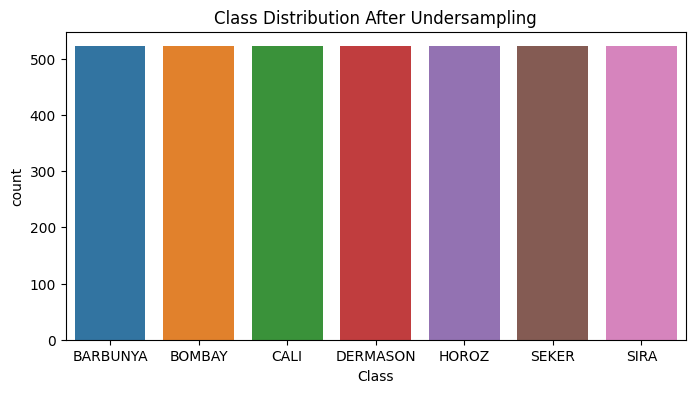

In [164]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=df_resampled)
plt.title("Class Distribution After Undersampling")
plt.show()

### RF UnderSampled

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Random forest after undersampling: {accuracy*100:.10f}")
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)

cv_scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")

Random forest after undersampling: 92.8896991796

Cross-validated Accuracy:
Fold 1: 92.07%
Fold 2: 92.20%
Fold 3: 94.53%
Fold 4: 93.57%
Fold 5: 92.05%

Average Cross-validated Accuracy: 92.88%


### DT UnderSampled

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Decision Tree after undersampling: {accuracy*100:.10f}")
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)

cv_scores = cross_val_score(dt_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")

Decision Tree after undersampling: 89.6991795807

Cross-validated Accuracy:
Fold 1: 89.88%
Fold 2: 89.06%
Fold 3: 91.24%
Fold 4: 91.79%
Fold 5: 91.10%

Average Cross-validated Accuracy: 90.61%


In [168]:
import pydotplus
from sklearn import tree
from IPython.display import Image

cols = [col for col in df.columns if col not in ['Class']]
data_features = df[cols]
dot_data = tree.export_graphviz(dt_classifier,
 out_file=None,
feature_names=data_features.columns,
 class_names=['SEKER','BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASO'])

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_graphviz_executables({'dot': 'C:/Program Files/Graphviz/bin/dot.exe'})  # Putanja na Eminom racunaru

Image(graph.create_png())

### ADABOOST UnderSampled

In [235]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost_classifier = AdaBoostClassifier(dt_classifier, n_estimators=50, random_state=42)

adaboost_classifier.fit(X_train, y_train)

y_pred = adaboost_classifier.predict(X_test)

accuracyADA = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracyADA*100:.2f}%")

cv_scores = cross_val_score(adaboost_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")

Accuracy: 90.25%

Cross-validated Accuracy:
Fold 1: 90.29%
Fold 2: 89.19%
Fold 3: 90.97%
Fold 4: 92.20%
Fold 5: 91.51%

Average Cross-validated Accuracy: 90.83%


### LGBM UnderSampled

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

lgbm_classifier = LGBMClassifier(random_state=42, verbose=-1)
lgbm_classifier.fit(X_train, y_train)

y_pred = lgbm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"LGBM after undersampling: {accuracy*100:.10f}")

cv_scores = cross_val_score(lgbm_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")



LGBM after undersampling: 93.1631722881

Cross-validated Accuracy:
Fold 1: 93.57%
Fold 2: 92.75%
Fold 3: 94.66%
Fold 4: 93.43%
Fold 5: 92.60%

Average Cross-validated Accuracy: 93.40%


### XGCB UnderSampled

In [170]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Kopiranje originalnog DataFrame-a
df_original = df.copy()

# Provera jedinstvenih vrednosti pre enkodiranja
unique_classes_before = df['Class'].unique()
print("Unique classes before LabelEncoder:", unique_classes_before)

# Enkodiranje ciljne promenljive
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Provera jedinstvenih vrednosti nakon enkodiranja
unique_classes_after = df['Class'].unique()
print("Unique classes after LabelEncoder:", unique_classes_after)

# Definisanje trening i test podataka
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kreiranje i treniranje modela
xgboost_classifier = XGBClassifier(random_state=42, verbosity=0)
xgboost_classifier.fit(X_train, y_train)

# Predviđanja i evaluacija
y_pred = xgboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"XGBoost after undersampling: {accuracy*100:.10f}")

# Cross-validacija sa StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgboost_classifier, X, y, cv=cv, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Unique classes before LabelEncoder: ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
Unique classes after LabelEncoder: [5 0 1 2 4 6 3]
XGBoost after undersampling: 92.3980903415

Cross-validated Accuracy:
Fold 1: 92.07%
Fold 2: 93.06%
Fold 3: 92.80%
Fold 4: 93.09%
Fold 5: 92.51%

Average Cross-validated Accuracy: 92.70%


## SMOTE OverSampling

### Distribucija po klasama nakon oversampling-a

In [171]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel('Dry_Bean_Dataset.xlsx')
X = df.drop('Class', axis=1)
y = df['Class']

print("Before OverSampling, counts of 'DERMASON': {}".format(sum(y == 'DERMASON')))
print("Before OverSampling, counts of 'SIRA': {}".format(sum(y == 'SIRA')))
print("Before OverSampling, counts of 'SEKER': {}".format(sum(y == 'SEKER')))
print("Before OverSampling, counts of 'HOROZ': {}".format(sum(y == 'HOROZ')))
print("Before OverSampling, counts of 'CALI': {}".format(sum(y == 'CALI')))
print("Before OverSampling, counts of 'BARBUNYA': {}".format(sum(y == 'BARBUNYA')))
print("Before OverSampling, counts of 'BOMBAY': {}\n".format(sum(y == 'BOMBAY')))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y.ravel())

print("After OverSampling, counts of 'DERMASON': {}".format(sum(y_res == 'DERMASON')))
print("After OverSampling, counts of 'SIRA': {}".format(sum(y_res == 'SIRA')))
print("After OverSampling, counts of 'SEKER': {}".format(sum(y_res == 'SEKER')))
print("After OverSampling, counts of 'HOROZ': {}".format(sum(y_res == 'HOROZ')))
print("After OverSampling, counts of 'CALI': {}".format(sum(y_res == 'CALI')))
print("After OverSampling, counts of 'BARBUNYA': {}".format(sum(y_res == 'BARBUNYA')))
print("After OverSampling, counts of 'BOMBAY': {}\n".format(sum(y_res == 'BOMBAY')))

Before OverSampling, counts of 'DERMASON': 3546
Before OverSampling, counts of 'SIRA': 2636
Before OverSampling, counts of 'SEKER': 2027
Before OverSampling, counts of 'HOROZ': 1928
Before OverSampling, counts of 'CALI': 1630
Before OverSampling, counts of 'BARBUNYA': 1322
Before OverSampling, counts of 'BOMBAY': 522

After OverSampling, counts of 'DERMASON': 3546
After OverSampling, counts of 'SIRA': 3546
After OverSampling, counts of 'SEKER': 3546
After OverSampling, counts of 'HOROZ': 3546
After OverSampling, counts of 'CALI': 3546
After OverSampling, counts of 'BARBUNYA': 3546
After OverSampling, counts of 'BOMBAY': 3546



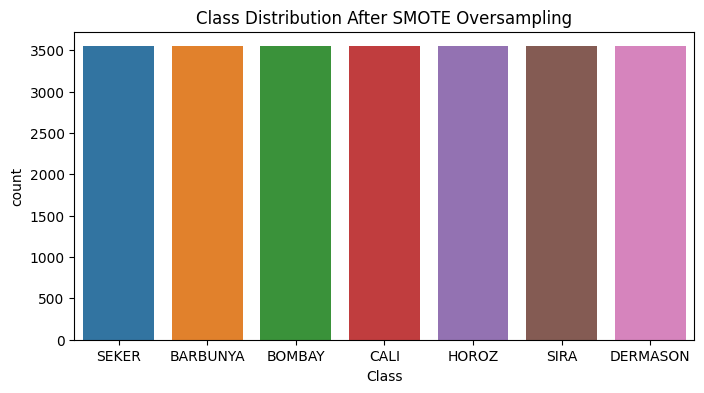

In [172]:
import seaborn as sns

Numeric_cols = df.drop(columns=['Class']).columns
df_resampled = pd.DataFrame(X_res, columns=Numeric_cols)
df_resampled["Class"] = y_res

plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=df_resampled)
plt.title("Class Distribution After SMOTE Oversampling")
plt.show()

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Class', axis=1)
y = df['Class']

scaler = MinMaxScaler()

columns_to_scale =  df.columns[:-1]

scaler.fit(df[columns_to_scale])

df[columns_to_scale] = scaler.transform(df[columns_to_scale])

### RF OverSampled

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_excel('Dry_Bean_Dataset.xlsx')
x_data = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

rf_selected = RandomForestClassifier()
rf_selected.fit(X_train, y_train)

cv_scores = cross_val_score(rf_selected, X_train, y_train, cv=7)  

accuracy = rf_selected.score(X_test, y_test)
formatted_accuracy = format(accuracy, '.2%')
print("Accuracy (without cross-validation):", formatted_accuracy)

#X_merged_df = X_train.append(X_test)
#y_merged_df = y_train.append(y_test)

X_merged = np.concatenate((X_train, X_test), axis=0)
y_merged = np.concatenate((y_train, y_test), axis=0)

cv_scores = cross_val_score(rf_selected, X_merged, y_merged, cv=5) 
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 95.14%
Cross-validated Accuracy: 95.28%


### DT OverSampled

In [180]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.2%')
print("Accuracy (without cross-validation):", formatted_accuracy)

#X_merged_df = X_train.append(X_test)
#y_merged_df = y_train.append(y_test)

X_merged_df = np.concatenate((X_train, X_test), axis=0) #pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = np.concatenate((y_train, y_test), axis=0) #pd.concat([y_train, y_test], axis=0, ignore_index=True)

cv_scores = cross_val_score(dt_model, X_merged_df, y_merged_df, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 92.90%
Cross-validated Accuracy: 92.98%


### LGBM OverSampled

In [181]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

lgbm_model = LGBMClassifier(verbose=-1)
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.2%')
print("Accuracy (without cross-validation):", formatted_accuracy)

X_merged = np.concatenate((X_train, X_test), axis=0)
y_merged = np.concatenate((y_train, y_test), axis=0)

cv_scores = cross_val_score(lgbm_model, X_merged, y_merged, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)


Accuracy (without cross-validation): 95.29%
Cross-validated Accuracy: 95.58%


### XGBM OverSampled

In [286]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

X = df.drop('Class', axis=1)
y = df['Class']

sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y.ravel())

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.2%')
print("Accuracy (without cross-validation):", formatted_accuracy)

X_merged = np.concatenate((X_train, X_test), axis=0)
y_merged = np.concatenate((y_train, y_test), axis=0)

cv_scores = cross_val_score(xgb_model, X_merged, y_merged, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 95.38%
Cross-validated Accuracy: 95.40%


## Podešavanje hiperparametara

### DT 

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#param = {
#    'criterion': ['gini'],
#    'max_depth': [i for i in range(20, 101, 10)], # [30, 50, 60, 100]
#    'min_samples_leaf': [i for i in range(2, 11, 1)], # [2, 3, 5, 10]
#    'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5] # [0.1, 0.2, 0.5]
#}

param = {'max_depth': [3, 5, 7, 9, 12, 15, 17], 'min_samples_leaf': [10, 50, 100, 150, 250, 300]}
# param = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [i for i in range(3, 10)],
#     'min_samples_leaf': [i for i in range(1, 6)],
#     'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5]
# }
#grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=6) # default scoring: accuracy_score
grid= GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=5)
grid.fit(X_train, y_train)
print('\n Best DT Classifier:', grid.best_params_, '\n\Best Score:', grid.best_score_)  


 Best DT Classifier: {'max_depth': 9, 'min_samples_leaf': 10} 
\Best Score: 0.9061345909928196


### RF

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param = {'max_depth': [15, 17, 20], 'min_samples_leaf': [10],
     'n_estimators': [100, 200, 300]}

grid= GridSearchCV(RandomForestClassifier(), param_grid=param, cv=5)
grid.fit(X_train, y_train)
print('\n Best RF Classifier:', grid.best_params_, '\n\Best Score:', grid.best_score_)  


 Best RF Classifier: {'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200} 
\Best Score: 0.9211977375964514


In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param = {'max_depth': [15, 17, 20], 'min_samples_leaf': [10],
     'n_estimators': [100, 200, 300]}

grid= GridSearchCV(rf_selected, param_grid=param, cv=5)
grid.fit(X_train, y_train)
print('\n Best RF Classifier:', grid.best_params_, '\n\Best Score:', grid.best_score_)  


 Best RF Classifier: {'max_depth': 17, 'min_samples_leaf': 10, 'n_estimators': 300} 
\Best Score: 0.9431366906474821


### KNN

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform, randint

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()

param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train)


print("Best Hyperparameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}%".format(random_search.best_score_ * 100))

Best Hyperparameters:  {'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
Best Accuracy: 92.51%


### LR

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()

param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(0.1, 10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': randint(50, 200),
    'multi_class':['ovr', 'multinomial']
}

random_search = RandomizedSearchCV(
    log_reg,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42
)
random_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}%".format(random_search.best_score_ * 100))

Best Hyperparameters:  {'C': 0.30584494295802445, 'max_iter': 51, 'multi_class': 'multinomial', 'penalty': 'none', 'solver': 'lbfgs'}
Best Accuracy: 92.47%


## Selekcija fičera / redukcija

### PCA

In [323]:
from sklearn import decomposition
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline


pca = decomposition.PCA(n_components=4)

def PCA_selection(model,modelName,test=False):
    pipe = Pipeline(steps=[('pca', pca),
                           ('model', model)])
    model = pipe.fit(X_train,y_train)
    prediction = model.predict(X_test)
    print(f"Best {modelName} accuracy : ",accuracy_score(y_test, prediction, normalize = True))
    if(test):
        print(model[1].n_features_in_)

#svc = SVC()
# decisionTree = DecisionTreeClassifier(ccp_alpha=0, criterion='entropy',
#                        min_samples_split=3, random_state=0,max_depth=4)
# randomForest = RandomForestClassifier(criterion='entropy', max_depth=80, max_features='sqrt',
#                        min_samples_split=7, n_estimators=2000, random_state=0)
#knn=KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

# PCA_selection(svc,"SVC",True)
# PCA_selection(decisionTree,"Decision Tree")
# PCA_selection(randomForest,"Random Forest")
PCA_selection(xgb_model,"XGBoost", True)
PCA_selection(lgbm_model,"LightGBM", True)
PCA_selection(dt_model,"DTree", True)
PCA_selection(rf_selected,"RForest SMOTE", True)
PCA_selection(grid,"RForest Hyp", True)

Best XGBoost accuracy :  0.94064724049953
4
Best LightGBM accuracy :  0.9430643212031691
4
Best DTree accuracy :  0.9241305223579965
4
Best RForest SMOTE accuracy :  0.9423929098966026
4
Best RForest Hyp accuracy :  0.9280247079360816
4


### Variance Threshold

In [324]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

X = df.drop('Class', axis=1)
y = df['Class']

pd.set_option('display.float_format', '{:.6f}'.format)
print("Variance of each feature in the original dataset:")
print(X.var())
pd.set_option('display.float_format', None)

sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(X, y.ravel())

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Add VarianceThreshold to remove low-variance features
variance_threshold = 0.05  # You can adjust this threshold as needed
variance_selector = VarianceThreshold(threshold=variance_threshold)

# Transform the data using VarianceThreshold
X_train_variance = variance_selector.fit_transform(X_train)
X_test_variance = variance_selector.transform(X_test)

# Concatenate the transformed data
X_merged_variance = np.concatenate((X_train_variance, X_test_variance), axis=0)
y_merged_variance = np.concatenate((y_train, y_test), axis=0)

Variance of each feature in the original dataset:
Area              355859326.084686
Perimeter             35855.514417
MajorAxisLength        6466.014665
MinorAxisLength        1078.107052
AspectRation              0.057117
Eccentricity              0.006912
Extent                    0.002299
Solidity                  0.000013
roundness                 0.003400
Compactness               0.003750
ShapeFactor1              0.000001
ShapeFactor2              0.000000
ShapeFactor3              0.009558
ShapeFactor4              0.000011
dtype: float64


In [325]:
# Create and train the XGBoost model with VarianceThreshold
xgb_model_variance = XGBClassifier()
xgb_model_variance.fit(X_train_variance, y_train)

# Evaluate the model on the test set
y_pred_variance = xgb_model_variance.predict(X_test_variance)
accuracy_variance = accuracy_score(y_test, y_pred_variance)
formatted_accuracy_variance = format(accuracy_variance, '.2%')
print("Accuracy with VarianceThreshold:", formatted_accuracy_variance)

# Cross-validated Accuracy with VarianceThreshold
cv_scores_variance = cross_val_score(xgb_model_variance, X_merged_variance, y_merged_variance, cv=5)  
average_accuracy_variance = cv_scores_variance.mean()
formatted_cv_accuracy_variance = format(average_accuracy_variance, '.2%')
print("Cross-validated Accuracy with VarianceThreshold:", formatted_cv_accuracy_variance)


Accuracy with VarianceThreshold: 93.41%
Cross-validated Accuracy with VarianceThreshold: 93.69%


In [326]:
lgbm_model_variance = LGBMClassifier()
lgbm_model_variance.fit(X_train_variance, y_train)

# Evaluate the model on the test set
y_pred_variance = lgbm_model_variance.predict(X_test_variance)
accuracy_variance = accuracy_score(y_test, y_pred_variance)
formatted_accuracy_variance = format(accuracy_variance, '.2%')
print("\nAccuracy with VarianceThreshold:", formatted_accuracy_variance)

# Cross-validated Accuracy with VarianceThreshold
cv_scores_variance = cross_val_score(lgbm_model_variance, np.concatenate((X_train_variance, X_test_variance), axis=0),
                                    np.concatenate((y_train, y_test), axis=0), cv=5)  
average_accuracy_variance = cv_scores_variance.mean()
formatted_cv_accuracy_variance = format(average_accuracy_variance, '.2%')
print("Cross-validated Accuracy with VarianceThreshold:", formatted_cv_accuracy_variance)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 17375, number of used features: 5
[LightGBM] [Info] Start training from score -1.954465
[LightGBM] [Info] Start training from score -1.950409
[LightGBM] [Info] Start training from score -1.951624
[LightGBM] [Info] Start training from score -1.946371
[LightGBM] [Info] Start training from score -1.941546
[LightGBM] [Info] Start training from score -1.927208
[LightGBM] [Info] Start training from score -1.950005
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Accuracy with VarianceThreshold: 93.54%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Numb

In [327]:
rf_model_variance = RandomForestClassifier()
rf_model_variance.fit(X_train_variance, y_train)

# Evaluate the model on the test set
y_pred_variance = rf_model_variance.predict(X_test_variance)
accuracy_variance = accuracy_score(y_test, y_pred_variance)
formatted_accuracy_variance = format(accuracy_variance, '.2%')
print("\nAccuracy with VarianceThreshold:", formatted_accuracy_variance)

# Cross-validated Accuracy with VarianceThreshold
cv_scores_variance = cross_val_score(rf_model_variance, np.concatenate((X_train_variance, X_test_variance), axis=0),
                                    np.concatenate((y_train, y_test), axis=0), cv=5)  
average_accuracy_variance = cv_scores_variance.mean()
formatted_cv_accuracy_variance = format(average_accuracy_variance, '.2%')
print("Cross-validated Accuracy with VarianceThreshold:", formatted_cv_accuracy_variance)


Accuracy with VarianceThreshold: 93.78%
Cross-validated Accuracy with VarianceThreshold: 93.82%


In [328]:
dt_model_variance = DecisionTreeClassifier()
dt_model_variance.fit(X_train_variance, y_train)

# Evaluate the model on the test set
y_pred_variance = dt_model_variance.predict(X_test_variance)
accuracy_variance = accuracy_score(y_test, y_pred_variance)
formatted_accuracy_variance = format(accuracy_variance, '.2%')
print("\nAccuracy with VarianceThreshold:", formatted_accuracy_variance)

# Cross-validated Accuracy with VarianceThreshold
cv_scores_variance = cross_val_score(dt_model_variance, np.concatenate((X_train_variance, X_test_variance), axis=0),
                                    np.concatenate((y_train, y_test), axis=0), cv=5)  
average_accuracy_variance = cv_scores_variance.mean()
formatted_cv_accuracy_variance = format(average_accuracy_variance, '.2%')
print("Cross-validated Accuracy with VarianceThreshold:", formatted_cv_accuracy_variance)


Accuracy with VarianceThreshold: 91.31%
Cross-validated Accuracy with VarianceThreshold: 91.64%


### Highly Correlated Matrix Feature Reduction

In [329]:
corr_matrix = data_features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
 k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
data_features_HCF = data_features.drop(data_features[to_drop],axis=1)
data_features_HCF.head(3)


Area  AspectRation  Extent  Solidity  roundness  ShapeFactor2  \
0  28395          1.20    0.76      0.99       0.96      3.15e-03   
1  28734          1.10    0.78      0.98       0.89      3.56e-03   
2  29380          1.21    0.78      0.99       0.95      3.05e-03   

   ShapeFactor4  
0           1.0  
1           1.0  
2           1.0

### Recursive Feature Elimination

#### DT

In [334]:
from sklearn.feature_selection import RFE

rfeDT = RFE(estimator=dt_classifier)
rfeDT_model = rfeDT.fit(X_train, y_train)
rfeDT_pred = rfeDT_model.predict(X_test)
print("Best number of features in DecisionTree: ",rfeDT.n_features_)
print("Accuracy : ",accuracy_score(y_test, rfeDT_pred, normalize = True))

Best number of features in DecisionTree:  7
Accuracy :  0.932993151604673


#### RF

In [335]:
rfeRF = RFE(estimator=rf_classifier)
rfeRF_model = rfeRF.fit(X_train, y_train)
rfeRF_pred= rfeRF_model.predict(X_test)
print("Best number of features in RandomForest: ",rfeRF.n_features_)
print("Accuracy : ",accuracy_score(y_test, rfeRF_pred, normalize = True))

Best number of features in RandomForest:  7
Accuracy :  0.9328588693433597


#### Odredjivanje broja atributa koji daju najbolju tacnost

In [342]:
def get_RFE_Features(estimator,numFeatures,modelName):
    rfe = RFE(estimator=estimator, n_features_to_select=numFeatures)
    rfe_model = rfe.fit(X_train, y_train)
    rfe_pred= rfe_model.predict(X_test)
    print(f" Number of features in {modelName} : ",rfe.n_features_)
    print("Accuracy : ",accuracy_score(y_test, rfe_pred, normalize = True))

In [343]:
for x in range(1,14):
    get_RFE_Features(dt_classifier,x,"DTree")

 Number of features in DTree :  1
Accuracy :  0.5183295286692627
 Number of features in DTree :  2
Accuracy :  0.8590036256210555
 Number of features in DTree :  3
Accuracy :  0.8655834564254062
 Number of features in DTree :  4
Accuracy :  0.9127165301463677
 Number of features in DTree :  5
Accuracy :  0.9180878205988989
 Number of features in DTree :  6
Accuracy :  0.9292332482879012
 Number of features in DTree :  7
Accuracy :  0.932993151604673
 Number of features in DTree :  8
Accuracy :  0.934873103263059
 Number of features in DTree :  9
Accuracy :  0.9343359742178058
 Number of features in DTree :  10
Accuracy :  0.9332617161272996
 Number of features in DTree :  11
Accuracy :  0.9354102323083121
 Number of features in DTree :  12
Accuracy :  0.9331274338659863
 Number of features in DTree :  13
Accuracy :  0.9337988451725527


In [344]:
for x in range(1,14):
    get_RFE_Features(rf_classifier,x,"RForest")

 Number of features in RForest :  1
Accuracy :  0.5284006982677588
 Number of features in RForest :  2
Accuracy :  0.8902913925070498
 Number of features in RForest :  3
Accuracy :  0.9323217402981067
 Number of features in RForest :  4
Accuracy :  0.9347388210017457
 Number of features in RForest :  5
Accuracy :  0.931113199946287
 Number of features in RForest :  6
Accuracy :  0.9340674096951793
 Number of features in RForest :  7
Accuracy :  0.9328588693433597
 Number of features in RForest :  8
Accuracy :  0.9379615952732644
 Number of features in RForest :  9
Accuracy :  0.9383644420572043
 Number of features in RForest :  10
Accuracy :  0.9380958775345777
 Number of features in RForest :  11
Accuracy :  0.9378273130119511
 Number of features in RForest :  12
Accuracy :  0.9464213777360011
 Number of features in RForest :  13
Accuracy :  0.9508526923593393


### Lasso

In [356]:
from sklearn.calibration import LinearSVC


lsvc = LinearSVC(C=0.01, penalty="l1", dual=False,random_state=0).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
data_train_Lasso = model.transform(X_train)
data_test_Lasso = model.transform(X_test)
print("New number of features: ",data_train_Lasso.shape[1])
print("Feature coefficients: \n",model.estimator.coef_)

def get_Lasso_score(estimator,modelName):
    model = estimator.fit(data_train_Lasso, y_train)
    pred = model.predict(data_test_Lasso)
    print(f"Best {modelName} accuracy : ",accuracy_score(y_test, pred, normalize = True))


New number of features:  8
Feature coefficients: 
 [[-6.42311094e-06  4.76149413e-03 -1.92494656e-02  2.52472778e-02
   2.74406770e-01  1.66664744e+00  0.00000000e+00  0.00000000e+00
  -6.02855726e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.05559114e-05  2.69686597e-03  1.57822425e-02 -2.20518596e-02
  -2.56367478e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.00087370e-04 -6.91943951e-03 -7.56778883e-03  6.35651960e-03
   1.01467059e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.69552918e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.07483140e+00  0.00000000e+00]
 [-1.50108269e-04 -7.86668282e-04  3.55528730e-03  3.09233395e-03
   0.00000000e+00  4.59287263e+00  0.00000000e+00  0.00000000e+00
   1.26201868e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.52150876e-05

In [359]:
get_Lasso_score(dt_classifier,"Decision Tree")

Best Decision Tree accuracy :  0.9201020545185981


In [358]:
get_Lasso_score(rf_classifier,"Random Forest")

Best Random Forest accuracy :  0.9401101114542769


## Jos neke Ensemble metode

### Bagging - RF sa optimizovanim hiperparametrima

In [346]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(grid,n_jobs=-1,n_estimators=10,random_state=0)
bagging_model = bagging.fit(X_train, y_train)
bagging_predict = bagging_model.predict(X_test)

print("Best Bagging accuracy : ",accuracy_score(y_test, bagging_predict, normalize = True))
print(confusion_matrix(y_test, bagging_predict))

Best Bagging accuracy :  0.9450785551228683
[[1023    0   49    0    3    1    9]
 [   0 1075    0    0    0    0    0]
 [  26    0 1031    0   12    2    7]
 [   0    0    0  974    1   13   77]
 [   5    0   16   11 1007    0   14]
 [   5    0    0   18    0  976   18]
 [   5    0    5   81   17   14  952]]


### Boosting (jos metoda pored AdaBoost)

#### GradientBoosting Classifier

In [347]:
from sklearn.ensemble import GradientBoostingClassifier 

gradboost = GradientBoostingClassifier(n_estimators=100)
gradboost_model = gradboost.fit(X_train, y_train)
gradboost_pred = gradboost_model.predict(X_test)

print("GradientBoost accuracy : ",accuracy_score(y_test, gradboost_pred, normalize = True))
print(confusion_matrix(y_test, gradboost_pred))

GradientBoost accuracy :  0.9489727407009534
[[1036    0   33    0    2    1   13]
 [   1 1074    0    0    0    0    0]
 [  19    0 1038    0   12    3    6]
 [   0    0    0  983    0   10   72]
 [   7    0   13    6 1012    0   15]
 [   6    0    0   17    0  975   19]
 [   1    0    3   88   20   13  949]]


In [ ]:
X_merged_df = np.concatenate((X_train, X_test), axis=0) #pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = np.concatenate((y_train, y_test), axis=0) #pd.concat([y_train, y_test], axis=0, ignore_index=True)

cv_scores = cross_val_score(gradboost, X_merged_df, y_merged_df, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

#### HistGradientBoostring Classifier

In [348]:
from sklearn.ensemble import HistGradientBoostingClassifier

histGradBoost = HistGradientBoostingClassifier(max_iter=100)
histGradBoost_Model = histGradBoost.fit(X_train, y_train)
histGradBoost_pred = histGradBoost_Model.predict(X_test)

print("HistogramGradientBoost accuracy : ",accuracy_score(y_test, histGradBoost_pred, normalize = True))
print(confusion_matrix(y_test, histGradBoost_pred))

HistogramGradientBoost accuracy :  0.9532697730629783
[[1044    0   29    0    1    0   11]
 [   0 1075    0    0    0    0    0]
 [  14    0 1046    0   10    3    5]
 [   0    0    0  975    0   11   79]
 [   5    0   11   10 1018    0    9]
 [   1    0    0   16    0  982   18]
 [   2    0    2   83   18   10  959]]


### Voting

In [351]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[('dt',dt_classifier),('rf',rf_classifier)], voting='hard')

votingClassifier_model = voting_classifier.fit(X_train, y_train)
votingClassifier_pred = votingClassifier_model.predict(X_test)

print("VotingClassifier accuracy : ",accuracy_score(y_test, votingClassifier_pred, normalize = True))
print(confusion_matrix(y_test, votingClassifier_pred))

VotingClassifier accuracy :  0.9399758291929636
[[1049    0   25    1    1    1    8]
 [   1 1074    0    0    0    0    0]
 [  41    0 1022    0    9    3    3]
 [   0    0    0 1005    3   12   45]
 [  14    0   21   10 1000    0    8]
 [   8    0    4   41    0  952   12]
 [  18    0    6  116   23   13  898]]


In [352]:
def getAccuracy(model,modelName):
    modelTrained = model.fit(X_train, y_train)
    prediction = modelTrained.predict(X_test)
    print(f"{modelName} accuracy : ",accuracy_score(y_test, prediction, normalize = True))

getAccuracy(dt_classifier,"DTree")
getAccuracy(rf_classifier,"RForest")

DTree accuracy :  0.9309789176849738
RForest accuracy :  0.9499127165301464


### Stacking

In [355]:
from sklearn.ensemble import StackingClassifier

stacking_classifier = StackingClassifier(estimators=[('dt',dt_classifier),('rf',rf_classifier)])

stackingClassifier_model = stacking_classifier.fit(X_train, y_train)
stackingClassifier_pred = stackingClassifier_model.predict(X_test)

print("StackingClassifier accuracy : ",accuracy_score(y_test, stackingClassifier_pred, normalize = True))
print(confusion_matrix(y_test, stackingClassifier_pred))

StackingClassifier accuracy :  0.9504498455753995
[[1042    0   29    0    3    1   10]
 [   0 1075    0    0    0    0    0]
 [  25    0 1033    0   11    3    6]
 [   0    0    0  982    1   12   70]
 [   6    0   16    8 1009    0   14]
 [   1    0    0   15    0  980   21]
 [   3    0    2   79   19   14  957]]
